In [1]:
import pandas as pd
import datetime
from dateutil.parser import parse
import matplotlib.pyplot as plt
import numpy as np
from datetime import date
from datetime import datetime
import seaborn as sns
import re
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
import nltk
#nltk.download('punkt')
from nltk.tokenize import regexp_tokenize
from nltk.tokenize import TweetTokenizer
from collections import Counter
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.stem.porter import PorterStemmer
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
import plotly.express as px

In [2]:
#import plotly.plotly as py
#import plotly.graph_objects as go
#import plotly.graph_objs as go
import plotly.graph_objects as go
#import chart_studio.plotly as py

In [3]:
df=pd.read_csv(r'Capstone_2/Combined_News_DJIA.csv',sep=',',parse_dates=True)
#df['Date']=[parse(row).strftime('%m-%d-%Y') for row in df['Date']]
df = df.loc[df['Date']<='2014-12-31']
print(df.shape)
df.head().iloc[:,0:15]

(1611, 27)


,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,Top11,Top12,Top13
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",b'Georgian troops retreat from S. Osettain cap...,b'Did the U.S. Prep Georgia for War with Russia?',b'Rice Gives Green Light for Israel to Attack ...,b'Announcing:Class Action Lawsuit on Behalf of...,"b""So---Russia and Georgia are at war and the N..."
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,b'Welcome To World War IV! Now In High Definit...,"b""Georgia's move, a mistake of monumental prop...",b'Russia presses deeper into Georgia; U.S. say...,b'Abhinav Bindra wins first ever Individual Ol...,b' U.S. ship heads for Arctic to define territ...
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...","b""The US military was surprised by the timing ...",b'U.S. Beats War Drum as Iran Dumps the Dollar',"b'Gorbachev: ""Georgian military attacked the S...",b'CNN use footage of Tskhinvali ruins to cover...,b'Beginning a war as the Olympics were opening...
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',"b""The commander of a Navy air reconnaissance s...","b""92% of CNN readers: Russia's actions in Geor...",b'USA to send fleet into Black Sea to help Geo...,"b""US warns against Israeli plan to strike agai...","b""In an intriguing cyberalliance, two Estonian..."
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree to missle defense deal. ...,"b'Will the Russians conquer Tblisi? Bet on it,...",b'Russia exaggerating South Ossetian death tol...,b' Musharraf expected to resign rather than fa...,b'Moscow Made Plans Months Ago to Invade Georgia',b'Why Russias response to Georgia was right',b'Nigeria has handed over the potentially oil-...


In [4]:
df.head().iloc[:,15:27]

,Top14,Top15,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,"b""China tells Bush to stay out of other countr...",b'Did World War III start today?',b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,b'Drivers in a Jerusalem taxi station threaten...,b'The French Team is Stunned by Phelps and the...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,b'55 pyramids as large as the Luxor stacked in...,b'The 11 Top Party Cities in the World',b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,b'The CNN Effect: Georgia Schools Russia in In...,b'Why Russias response to Georgia was right',b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,b'The US and Poland have agreed a preliminary ...,b'Russia apparently is sabotaging infrastructu...,b'Bank analyst forecast Georgian crisis 2 days...,"b""Georgia confict could set back Russia's US r...",b'War in the Caucasus is as much the product o...,"b'""Non-media"" photos of South Ossetia/Georgia ...",b'Georgian TV reporter shot by Russian sniper ...,b'Saudi Arabia: Mother moves to block child ma...,b'Taliban wages war on humanitarian aid workers',"b'Russia: World ""can forget about"" Georgia\'s...",b'Darfur rebels accuse Sudan of mounting major...,b'Philippines : Peace Advocate say Muslims nee...


In [5]:
df.tail().iloc[:,0:15]

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,Top11,Top12,Top13
1606,2014-12-24,1,Death toll among Qatars 2022 World Cup workers...,Fishing Supertrawlers to be banned permanently...,Indian telecommunications company Airtel viola...,North Korea's Internet is down again; second b...,Jakarta to ban virginity tests for female civi...,Workers at Chinese iPhone factories are pressu...,Thousands in Spain protest ban on demonstratio...,London activists occupy 5-storey former bank i...,"Russian Inflation Passes 10%, Indicates Pricin...",Australia records biggest emissions drop in a ...,Elephant ivory smuggling 'kingpin' arrested in...,Ireland: US courts need our permission to view...,Record numbers attend German anti-Islamization...
1607,2014-12-26,1,Saudis are eagerly awaiting the approval of a ...,"Due to the fall in oil prices, Saudi Arabia is...",Bill giving government the power to shutdown t...,A struggle for women's rights is brewing withi...,Putin cancels New Year's Holiday for governmen...,Ireland is siding with Microsoft in its legal ...,More than 80 people including women and childr...,"The Syrian Army has killed nearly 5,000 Islami...",ISIS governor of Mosul killed in airstrikes,Court clears way for clinically dead pregnant ...,A court in Mauritania has sentenced a man to d...,"A group of four women, along with their 13 chi...",China has stepped up efforts to reduce the num...
1608,2014-12-29,0,Solar Power Storage Prices Drop 25% In Germany...,North Korea Hit Again By Internet Outage; Expe...,ARCHAEOLOGY - Massive ancient underground city...,Reopen investigation into Westminster pedophil...,"Taliban declare 'defeat' of U.S., allies in Af...",British Falklands defence review after militar...,Virgin Confirms Fault On Plane Circling Over UK,Photo of 'women murdered for refusing sex jiha...,The German chancellor's office has fallen vict...,Thirty-seven children whose parents were kille...,"One Dead And 15,000 Stranded In French Alps","IED blows up in Bangalore, high alert in India",Rise of Spanish populists overturns two-party ...
1609,2014-12-30,0,China businessman jailed for 13 years for buyi...,"AirAsia live: Emergency slide, plane door seen...","AirAsia plane wreckage found, bodies being rec...",Scotland confirms case of Ebola - Ebola cases ...,Pope Francis to Catholics: It's time to take a...,Oil hits five-and-a-half-year low below $57 on...,"""Lizard Squad"" members who ruined Christmas fo...",Two students in Thailand face up to 15 years i...,New Research Blames Insiders Not North Korea f...,Russian ruble drops 7 percent as economy shrinks,Egyptian court permanently bans Jewish festiva...,Turkish anchorwoman detained for tweet about c...,French Government Quietly Enacts Controversial...
1610,2014-12-31,0,AirAsia flight found at the bottom of the Java...,North Korean defector details 'human experimen...,Korean Air ex-executive Cho Hyun-ah arrested -...,"South Korean to drop Sony film ""The Interview""...",U.S. opening of oil export widens battle: The ...,FBI agents investigating the Sony Pictures hac...,Indian Government Orders Blocking of 32 Websit...,Russia annual inflation jumps to 11.4% as roub...,"WikiLeaks claims employees Google mail, metada...",Militant mistakenly broadcasts his location,Armed bandits rob 300 tourists on Venezuela beach,"Venezuela confirms recession, inflation hits 6...",Palestinian UN resolution fails


In [6]:
df.tail().iloc[:,15:27]

,Top14,Top15,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
1606,Erdogan slams birth control use as treason,Gunman fires on Paris synagogue,Scientists discover oldest stone tool ever fou...,ISIS claims capture of Jordanian pilot after p...,Russian prime minister warns of 'deep recessio...,Russia says France must fulfil Mistral contrac...,Secret flight linking Israel to the UAE reveal...,Ukraine temporarily cuts off power supplies to...,Coalition plane 'crashes in Syria',Across the world 'Silent Night' to honor WWI X...,Elderly Nigerians Rounded Up And Shot Dead,Russia May Be Cut to Junk rating as S&amp;P Sa...
1607,Archaeologists Have Dig Licenses Revoked After...,German fossil fuel consumption and emissions a...,Senior UN officials expelled from Sudan follow...,Mauritania journalist sentenced to death for a...,Kim Dotcom Makes Deal with LizardSquad to stop...,Ukraine peace talks called off,Tibetan protests reported in China's Sichuan,New Study Adds to Skepticism Among Security Ex...,"US relocates 3,000 MRAPs, other military gear ...",Russia's new military doctrine names NATO as a...,Protesters in Mexico claim that German arms ma...,A leading Russian elected official on Thursday...
1608,"Iran could become a ""very successful regional ...",Greek MPs have rejected the presidential candi...,"Islamic State executed nearly 2,000 people in ...",The leader of one of Mexico's first anti-crime...,Gmail has been blocked in China,Egyptian writer to face trial for 'insulting I...,Reports reveal scale of destruction of Syrias ...,Russia will supply coal and electricity to Kie...,ISIS executes more doctors in Mosul,Russia shows first sign of recession as GDP co...,"AirAsia plane likely 'at bottom of the sea,' s...",AirAsia Flight's Altitude Request Was Refused
1609,Bosnian Police Raid Top News Website: Police r...,"Possible Case of Ebola in Glasgow, Scotland",Turkey is being used as one of the primary rou...,Swedish mosque set ablaze in second suspected ...,Cybersecurity Firm Identifies Six In Sony Hack...,The U.N. General Assembly voted unanimously Mo...,"""The regime must be destroyed"": Alexei Navalny...","Aleksei Navalny, Russian opposition leader, is...","Search area for Air Asia QZ8501 expanded, stil...",Ebola case confirmed in Glasgow | World news,AirAsia plane carrying 153 people overshoots r...,One of China's most industrialized cities has ...
1610,More non-Mexicans than Mexicans apprehended at...,Belarus eager to normalize relations with West,Newly published NSA documents show agency coul...,Britain says it cannot support new Palestinian...,Bolivias Morales: US 'Backs Drug Trafficking',Euro zone politicians are not obliged to rescu...,Greece Dissolves Parliament to Prepare for Ear...,German Chancellor Angela Merkel in a New Year'...,Al Shabaab leader killed in U.S. air strike in...,New solar power material converts 90 percent o...,China launches website laying claim to Senkaku...,At Least 33 Killed in Yemen Suicide Bombing


In [7]:
#df.info()

In [8]:
#df['Top1']=[row.strip("b'") for row in df['Top1']]

#df['Top1']=[[row[i].strip("b'") for row in df['Top1']] for i in range(5)]
df_text = df.iloc[:,2:27]
df_text = df_text.applymap(lambda x: str(x))
df_text = df_text.applymap(lambda x: x.strip("b'"))
#df.head().iloc[:,0:15]
df_text.head()

,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,"""Georgia 'downs two Russian warplanes' as coun...",BREAKING: Musharraf to be impeached.,Russia Today: Columns of troops roll into Sout...,Russian tanks are moving towards the capital o...,"""Afghan children raped with 'impunity,' U.N. o...",150 Russian tanks have entered South Ossetia w...,"""Breaking: Georgia invades South Ossetia, Russ...","""The 'enemy combatent' trials are nothing but ...",Georgian troops retreat from S. Osettain capit...,Did the U.S. Prep Georgia for War with Russia?,...,Georgia Invades South Ossetia - if Russia gets...,Al-Qaeda Faces Islamist Backlash,"Condoleezza Rice: ""The US would not act to pre...",This is a busy day: The European Union has ap...,"""Georgia will withdraw 1,000 soldiers from Ira...",Why the Pentagon Thinks Attacking Iran is a Ba...,Caucasus in crisis: Georgia invades South Ossetia,Indian shoe manufactory - And again in a seri...,Visitors Suffering from Mental Illnesses Banne...,"""No Help for Mexico's Kidnapping Surge"""
1,Why wont America and Nato help us? If they won...,Bush puts foot down on Georgian conflict,"""Jewish Georgian minister: Thanks to Israeli t...",Georgian army flees in disarray as Russians ad...,"""Olympic opening ceremony fireworks 'faked'""",What were the Mossad with fraudulent New Zeala...,Russia angered by Israeli military sale to Geo...,An American citizen living in S.Ossetia blames...,Welcome To World War IV! Now In High Definition!,"""Georgia's move, a mistake of monumental propo...",...,Israel and the US behind the Georgian aggression?,"""Do not believe TV, neither Russian nor Georgi...",Riots are still going on in Montreal (Canada) ...,China to overtake US as largest manufacturer,War in South Ossetia [PICS],Israeli Physicians Group Condemns State Torture,Russia has just beaten the United States over...,Perhaps *the* question about the Georgia - Rus...,Russia is so much better at war,"""So this is what it's come to: trading sex for..."
2,Remember that adorable 9-year-old who sang at ...,"""Russia 'ends Georgia operation'""","""If we had no sexual harassment we would have ...","""Al-Qa'eda is losing support in Iraq because o...",Ceasefire in Georgia: Putin Outmaneuvers the West,Why Microsoft and Intel tried to kill the XO $...,Stratfor: The Russo-Georgian War and the Balan...,"""I'm Trying to Get a Sense of This Whole Georg...","""The US military was surprised by the timing a...",U.S. Beats War Drum as Iran Dumps the Dollar,...,U.S. troops still in Georgia (did you know the...,Why Russias response to Georgia was right,"Gorbachev accuses U.S. of making a ""serious bl...","Russia, Georgia, and NATO: Cold War Two",Remember that adorable 62-year-old who led you...,War in Georgia: The Israeli connection,All signs point to the US encouraging Georgia ...,Christopher King argues that the US and NATO a...,America: The New Mexico?,"""BBC NEWS | Asia-Pacific | Extinction 'by man ..."
3,U.S. refuses Israel weapons to attack Iran: r...,"""When the president ordered to attack Tskhinva...",Israel clears troops who killed Reuters camer...,"Britain\'s policy of being tough on drugs is ""...",Body of 14 year old found in trunk; Latest (ra...,China has moved 10 *million* quake survivors i...,"""Bush announces Operation Get All Up In Russia...",Russian forces sink Georgian ships,"""The commander of a Navy air reconnaissance sq...","""92% of CNN readers: Russia's actions in Georg...",...,Elephants extinct by 2020?,US humanitarian missions soon in Georgia - if ...,"""Georgia's DDOS came from US sources""","Russian convoy heads into Georgia, violating t...",Israeli defence minister: US against strike on...,Gorbachev: We Had No Choice,Witness: Russian forces head towards Tbilisi i...,Quarter of Russians blame U.S. for conflict: ...,Georgian president says US military will take...,2006: Nobel laureate Aleksander Solzhenitsyn a...
4,All the experts admit that we shou

In [9]:
df = df[['Date','Label']]
#df.head()
df = pd.concat([df, df_text], axis=1)
df.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"""Georgia 'downs two Russian warplanes' as coun...",BREAKING: Musharraf to be impeached.,Russia Today: Columns of troops roll into Sout...,Russian tanks are moving towards the capital o...,"""Afghan children raped with 'impunity,' U.N. o...",150 Russian tanks have entered South Ossetia w...,"""Breaking: Georgia invades South Ossetia, Russ...","""The 'enemy combatent' trials are nothing but ...",...,Georgia Invades South Ossetia - if Russia gets...,Al-Qaeda Faces Islamist Backlash,"Condoleezza Rice: ""The US would not act to pre...",This is a busy day: The European Union has ap...,"""Georgia will withdraw 1,000 soldiers from Ira...",Why the Pentagon Thinks Attacking Iran is a Ba...,Caucasus in crisis: Georgia invades South Ossetia,Indian shoe manufactory - And again in a seri...,Visitors Suffering from Mental Illnesses Banne...,"""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,Why wont America and Nato help us? If they won...,Bush puts foot down on Georgian conflict,"""Jewish Georgian minister: Thanks to Israeli t...",Georgian army flees in disarray as Russians ad...,"""Olympic opening ceremony fireworks 'faked'""",What were the Mossad with fraudulent New Zeala...,Russia angered by Israeli military sale to Geo...,An American citizen living in S.Ossetia blames...,...,Israel and the US behind the Georgian aggression?,"""Do not believe TV, neither Russian nor Georgi...",Riots are still going on in Montreal (Canada) ...,China to overtake US as largest manufacturer,War in South Ossetia [PICS],Israeli Physicians Group Condemns State Torture,Russia has just beaten the United States over...,Perhaps *the* question about the Georgia - Rus...,Russia is so much better at war,"""So this is what it's come to: trading sex for..."
2,2008-08-12,0,Remember that adorable 9-year-old who sang at ...,"""Russia 'ends Georgia operation'""","""If we had no sexual harassment we would have ...","""Al-Qa'eda is losing support in Iraq because o...",Ceasefire in Georgia: Putin Outmaneuvers the West,Why Microsoft and Intel tried to kill the XO $...,Stratfor: The Russo-Georgian War and the Balan...,"""I'm Trying to Get a Sense of This Whole Georg...",...,U.S. troops still in Georgia (did you know the...,Why Russias response to Georgia was right,"Gorbachev accuses U.S. of making a ""serious bl...","Russia, Georgia, and NATO: Cold War Two",Remember that adorable 62-year-old who led you...,War in Georgia: The Israeli connection,All signs point to the US encouraging Georgia ...,Christopher King argues that the US and NATO a...,America: The New Mexico?,"""BBC NEWS | Asia-Pacific | Extinction 'by man ..."
3,2008-08-13,0,U.S. refuses Israel weapons to attack Iran: r...,"""When the president ordered to attack Tskhinva...",Israel clears troops who killed Reuters camer...,"Britain\'s policy of being tough on drugs is ""...",Body of 14 year old found in trunk; Latest (ra...,China has moved 10 *million* quake survivors i...,"""Bush announces Operation Get All Up In Russia...",Russian forces sink Georgian ships,...,Elephants extinct by 2020?,US humanitarian missions soon in Georgia - if ...,"""Georgia's DDOS came from US sources""","Russian convoy heads into Georgia, violating t...",Israeli defence minister: US against strike on...,Gorbachev: We Had No Choice,Witness: Russian forces head towards Tbilisi i...,Quarter of Russians blame U.S. for conflict: ...,Georgian president says US military will take...,2006: Nobel laureate Aleksander Solzhenitsyn a...
4,2008-08-14,1,All the experts admit that we should legalise ...,War in South Osetia - 89 pictures made by a Ru...,Swedish wrestler Ara Abrahamian throws away me...,Russia exaggerated the death toll in South Oss...,Missile That Killed 9 Inside Pakistan May Have...,"""Rushdie Condemns Random House's Refusal to Pu...",Poland and US agree to missle defense deal. In...,"Will the Russians 

In [10]:
print(df.shape)
df.head()

(1611, 27)


,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"""Georgia 'downs two Russian warplanes' as coun...",BREAKING: Musharraf to be impeached.,Russia Today: Columns of troops roll into Sout...,Russian tanks are moving towards the capital o...,"""Afghan children raped with 'impunity,' U.N. o...",150 Russian tanks have entered South Ossetia w...,"""Breaking: Georgia invades South Ossetia, Russ...","""The 'enemy combatent' trials are nothing but ...",...,Georgia Invades South Ossetia - if Russia gets...,Al-Qaeda Faces Islamist Backlash,"Condoleezza Rice: ""The US would not act to pre...",This is a busy day: The European Union has ap...,"""Georgia will withdraw 1,000 soldiers from Ira...",Why the Pentagon Thinks Attacking Iran is a Ba...,Caucasus in crisis: Georgia invades South Ossetia,Indian shoe manufactory - And again in a seri...,Visitors Suffering from Mental Illnesses Banne...,"""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,Why wont America and Nato help us? If they won...,Bush puts foot down on Georgian conflict,"""Jewish Georgian minister: Thanks to Israeli t...",Georgian army flees in disarray as Russians ad...,"""Olympic opening ceremony fireworks 'faked'""",What were the Mossad with fraudulent New Zeala...,Russia angered by Israeli military sale to Geo...,An American citizen living in S.Ossetia blames...,...,Israel and the US behind the Georgian aggression?,"""Do not believe TV, neither Russian nor Georgi...",Riots are still going on in Montreal (Canada) ...,China to overtake US as largest manufacturer,War in South Ossetia [PICS],Israeli Physicians Group Condemns State Torture,Russia has just beaten the United States over...,Perhaps *the* question about the Georgia - Rus...,Russia is so much better at war,"""So this is what it's come to: trading sex for..."
2,2008-08-12,0,Remember that adorable 9-year-old who sang at ...,"""Russia 'ends Georgia operation'""","""If we had no sexual harassment we would have ...","""Al-Qa'eda is losing support in Iraq because o...",Ceasefire in Georgia: Putin Outmaneuvers the West,Why Microsoft and Intel tried to kill the XO $...,Stratfor: The Russo-Georgian War and the Balan...,"""I'm Trying to Get a Sense of This Whole Georg...",...,U.S. troops still in Georgia (did you know the...,Why Russias response to Georgia was right,"Gorbachev accuses U.S. of making a ""serious bl...","Russia, Georgia, and NATO: Cold War Two",Remember that adorable 62-year-old who led you...,War in Georgia: The Israeli connection,All signs point to the US encouraging Georgia ...,Christopher King argues that the US and NATO a...,America: The New Mexico?,"""BBC NEWS | Asia-Pacific | Extinction 'by man ..."
3,2008-08-13,0,U.S. refuses Israel weapons to attack Iran: r...,"""When the president ordered to attack Tskhinva...",Israel clears troops who killed Reuters camer...,"Britain\'s policy of being tough on drugs is ""...",Body of 14 year old found in trunk; Latest (ra...,China has moved 10 *million* quake survivors i...,"""Bush announces Operation Get All Up In Russia...",Russian forces sink Georgian ships,...,Elephants extinct by 2020?,US humanitarian missions soon in Georgia - if ...,"""Georgia's DDOS came from US sources""","Russian convoy heads into Georgia, violating t...",Israeli defence minister: US against strike on...,Gorbachev: We Had No Choice,Witness: Russian forces head towards Tbilisi i...,Quarter of Russians blame U.S. for conflict: ...,Georgian president says US military will take...,2006: Nobel laureate Aleksander Solzhenitsyn a...
4,2008-08-14,1,All the experts admit that we should legalise ...,War in South Osetia - 89 pictures made by a Ru...,Swedish wrestler Ara Abrahamian throws away me...,Russia exaggerated the death toll in South Oss...,Missile That Killed 9 Inside Pakistan May Have...,"""Rushdie Condemns Random House's Refusal to Pu...",Poland and US agree to missle defense deal. In...,"Will the Russians 

In [11]:
df2=pd.read_csv(r'Capstone_2/upload_DJIA_table.csv',sep=',',parse_dates=True,dtype={'Open': float,'High':float,'Low':float,'Close':float,'Volume':float,'Adj Close':float})
#df2['Date']=[parse(row).strftime('%m-%d-%Y') for row in df2['Date']]
df2 = df2.loc[df2['Date']<='2014-12-31']
df2_test = df2.loc[df2['Date']>'2014-12-31']
print(df2.shape)
#print(df2.dtypes)
df2.head()

(1611, 7)


,Date,Open,High,Low,Close,Volume,Adj Close
378,2014-12-31,17987.660156,18043.220703,17820.880859,17823.070312,82840000.0,17823.070312
379,2014-12-30,18035.019531,18035.019531,17959.699219,17983.070312,47490000.0,17983.070312
380,2014-12-29,18046.580078,18073.039062,18021.570312,18038.230469,53870000.0,18038.230469
381,2014-12-26,18038.300781,18103.449219,18038.300781,18053.710938,52570000.0,18053.710938
382,2014-12-24,18035.730469,18086.240234,18027.779297,18030.210938,42870000.0,18030.210938


In [12]:
df2.tail()

,Date,Open,High,Low,Close,Volume,Adj Close
1984,2008-08-14,11532.070312,11718.280273,11450.889648,11615.929688,159790000.0,11615.929688
1985,2008-08-13,11632.809570,11633.780273,11453.339844,11532.959961,182550000.0,11532.959961
1986,2008-08-12,11781.700195,11782.349609,11601.519531,11642.469727,173590000.0,11642.469727
1987,2008-08-11,11729.669922,11867.110352,11675.530273,11782.349609,183190000.0,11782.349609
1988,2008-08-08,11432.089844,11759.959961,11388.040039,11734.320312,212830000.0,11734.320312


In [13]:
df3=pd.read_csv(r'Capstone_2/RedditNews.csv',sep=',',parse_dates=True)
#df2['Date']=[parse(row).strftime('%m-%d-%Y') for row in df2['Date']]
df3 = df3.loc[df3['Date']<='2014-12-31']
print(df3.shape)
#print(df2.dtypes)
df3.head(25)

(59933, 2)


,Date,News
13675,2014-12-31,AirAsia flight found at the bottom of the Java...
13676,2014-12-31,North Korean defector details 'human experimen...
13677,2014-12-31,Korean Air ex-executive Cho Hyun-ah arrested -...
13678,2014-12-31,"South Korean to drop Sony film ""The Interview""..."
13679,2014-12-31,U.S. opening of oil export widens battle: The ...
13680,2014-12-31,FBI agents investigating the Sony Pictures hac...
13681,2014-12-31,Indian Government Orders Blocking of 32 Websit...
13682,2014-12-31,Russia annual inflation jumps to 11.4% as roub...
13683,2014-12-31,"WikiLeaks claims employees Google mail, metada..."
13684,2014-12-31,Militant mistakenly broadcasts his location


In [14]:
df3.iloc[0:5]

,Date,News
13675,2014-12-31,AirAsia flight found at the bottom of the Java...
13676,2014-12-31,North Korean defector details 'human experimen...
13677,2014-12-31,Korean Air ex-executive Cho Hyun-ah arrested -...
13678,2014-12-31,"South Korean to drop Sony film ""The Interview""..."
13679,2014-12-31,U.S. opening of oil export widens battle: The ...


In [15]:
#df.head()
spaces = r"\s+"
#print(re.split(spaces, my_string))
#df['test']=re.split(spaces,df['Top1'])
df['test']=[re.split(spaces,row) for row in df['Top1']]
df['test'].head(1)
df['test'].head(1).values

array([list(['"Georgia', "'downs", 'two', 'Russian', "warplanes'", 'as', 'countries', 'move', 'to', 'brink', 'of', 'war"'])],
      dtype=object)

In [16]:
def preprocessor(text):
    text = re.split(r"\s+",text)
    #text = re.split(r'\Ab"',text)
    return text
def preprocessor2(text):
    text = re.split(r'\Ab"',text)
    return text

df['test2']= df['Top1'].apply(preprocessor)
#df['test2']= df['Top1'].apply(preprocessor2)
#df['test3']= df['test2'].apply(preprocessor2)
df['test2'].head(1).values
#df['test3']=[re.split(r'\Ab"',row) for row in df['test2']]
#df['test3'].head(1).values

array([list(['"Georgia', "'downs", 'two', 'Russian', "warplanes'", 'as', 'countries', 'move', 'to', 'brink', 'of', 'war"'])],
      dtype=object)

In [17]:
string = "b'Georgia downs two"
pattern = "\Ab'"

result = re.split(pattern, string)
print(result)
#result2 = result.split(",")
#print(result2)

['', 'Georgia downs two']


In [18]:
string = "b'Georgia downs two"
result = string.strip("b'")
result
pattern = r"\s+"

result = re.split(pattern, result)
print(result)

['Georgia', 'downs', 'two']


In [161]:
count = CountVectorizer()
#docs = np.array(['The sun is shining','The weather is sweet','The sun is shining and the weather is sweet'])
#bag = count.fit_transform(docs)
bag = count.fit_transform(df3['News'])
print(len(count.vocabulary_))
#count.vocabulary_

37376


**EDA of small data set to test Tokenization, Stemming, Lemmatization and TFIDF**

In [20]:
porter = PorterStemmer()

def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

df3_mini = df3.head(2)

#tokenizer_porter('runners like running and thus they run')
df3['token']= df3['News'].head(2).apply(tokenizer_porter)
df3['token_alt'] = df3['News'].head(2).apply(word_tokenize)


print(df3['News'].head(2).values)
df3['token'].head(2).values

['AirAsia flight found at the bottom of the Java Sea'
 "North Korean defector details 'human experiments' -- use of mentally and physically handicapped children in chemical weapons tests 'the last straw'"]


array([list(['airasia', 'flight', 'found', 'at', 'the', 'bottom', 'of', 'the', 'java', 'sea']),
       list(['north', 'korean', 'defector', 'detail', "'human", "experiments'", '--', 'use', 'of', 'mental', 'and', 'physic', 'handicap', 'children', 'in', 'chemic', 'weapon', 'test', "'the", 'last', "straw'"])],
      dtype=object)

In [21]:
df3.head(5)

,Date,News,token,token_alt
13675,2014-12-31,AirAsia flight found at the bottom of the Java...,"[airasia, flight, found, at, the, bottom, of, ...","[AirAsia, flight, found, at, the, bottom, of, ..."
13676,2014-12-31,North Korean defector details 'human experimen...,"[north, korean, defector, detail, 'human, expe...","[North, Korean, defector, details, 'human, exp..."
13677,2014-12-31,Korean Air ex-executive Cho Hyun-ah arrested -...,NaN,NaN
13678,2014-12-31,"South Korean to drop Sony film ""The Interview""...",NaN,NaN
13679,2014-12-31,U.S. opening of oil export widens battle: The ...,NaN,NaN


In [22]:
df3.head(2)

,Date,News,token,token_alt
13675,2014-12-31,AirAsia flight found at the bottom of the Java...,"[airasia, flight, found, at, the, bottom, of, ...","[AirAsia, flight, found, at, the, bottom, of, ..."
13676,2014-12-31,North Korean defector details 'human experimen...,"[north, korean, defector, detail, 'human, expe...","[North, Korean, defector, details, 'human, exp..."


In [148]:
#df['test'].head(2).values

In [147]:
#df['test2'].head(1).values

In [25]:
#df['test3'].head(1).values

In [26]:
#word_tokenize
#tokenizer_porter

In [27]:
#Tokenization of the text

vectorizer = CountVectorizer(stop_words='english')
#vectorizer = CountVectorizer(tokenizer=tokenizer_porter,stop_words='english')
#vectorizer = CountVectorizer(tokenizer=word_tokenize,stop_words='english')
#vectorizer = CountVectorizer()
#vectorizer.fit(df3['News'].head(2))
x = vectorizer.fit_transform(df3['News'].head(5))
x = x.toarray()
print(x.shape)
print(x)
print(vectorizer.get_feature_names())
print()
#print(sorted(vectorizer.get_stop_words()))

(5, 67)
[[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0
  1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0]
 [0 1 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0
  0 0 1 0 1 0 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0
  0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 1 2 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1
  0 1 1 0 0 1 2 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 0 1 1 0]]
['administration', 'ah', 'air', 'airasia', 'arrested', 'bag', 'balloon', 'barrels', 'battle', 'chemical', 'children', 'cho', 'clearing', 'crude', 'day', 'defector', 'details', 'drop', 'earlier', 'effectively', 'ex', 'executive', 'experiments', 'export', 'film', 'flight', 'global', 'handicapped',

In [28]:
x_df = pd.DataFrame(x)
x_df.columns = vectorizer.get_feature_names()
x_df.head().iloc[:,0:15]

,administration,ah,air,airasia,arrested,bag,balloon,barrels,battle,chemical,children,cho,clearing,crude,day
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
2,0,1,1,0,1,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,1,2,0,0,0,1,1,1


In [29]:
x_df.head().iloc[:,15:25]

,defector,details,drop,earlier,effectively,ex,executive,experiments,export,film
0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,1,0,0
2,0,0,0,1,0,1,1,0,0,0
3,0,0,1,0,0,0,0,0,0,1
4,0,0,0,0,1,0,0,0,1,0


In [30]:
#Get the token count in long format and sort the values
#nltk.download('averaged_perceptron_tagger')

#print(x2_df.columns)
token_count_df = x_df.sum(numeric_only=True, axis=0)
token_count_df = token_count_df.reset_index()
token_count_df.columns = ['Token','Count']
print(token_count_df.shape)
token_count_df['POS'] = nltk.pos_tag(token_count_df['Token'])
token_count_df['POS'] = [row[1] for row in token_count_df['POS']]
token_count_df.sort_values('Count',ascending=False)[0:25]

(67, 2)


,Token,Count,POS
33,korean,3,JJ
38,new,2,JJ
42,oil,2,NN
39,north,2,JJ
8,battle,2,NN
37,million,1,CD
40,nuts,1,NNS
41,obama,1,JJ
50,runway,1,NN
36,mentally,1,RB


In [31]:
#df3.head(2)

In [32]:
#Return the TFIDF on the tokens

tfidf = TfidfTransformer()
np.set_printoptions(precision=2)
new_df = tfidf.fit_transform(vectorizer.fit_transform(df3['News'].head(2))).toarray()
#print(vectorizer.get_feature_names())
print(new_df.shape)
token_tfidf_df = pd.DataFrame(new_df,columns=vectorizer.get_feature_names())
token_tfidf_df

(2, 19)


,airasia,chemical,children,defector,details,experiments,flight,handicapped,human,java,korean,mentally,north,physically,sea,straw,tests,use,weapons
0,0.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.5,0.000000,0.000000,0.5,0.000000,0.000000,0.000000,0.000000,0.5,0.000000,0.000000,0.000000,0.000000
1,0.0,0.258199,0.258199,0.258199,0.258199,0.258199,0.0,0.258199,0.258199,0.0,0.258199,0.258199,0.258199,0.258199,0.0,0.258199,0.258199,0.258199,0.258199


In [33]:
#Stems the word and returns the count

import nltk.stem
english_stemmer = nltk.stem.SnowballStemmer('english')

class StemmedCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedCountVectorizer,self).build_analyzer()
        return lambda doc: (english_stemmer.stem(w) for w in analyzer(doc))

vectorizer2 = StemmedCountVectorizer(min_df=1,stop_words='english')

In [34]:
#Stemming the data and returning the counts
#Test run on small dataset

x2 = vectorizer2.fit_transform(df3['News'].head(3))
x2 = x2.toarray()
print(x2.shape)
#print(x2)
#print(vectorizer2.get_feature_names())
x2_df = pd.DataFrame(x2, columns=vectorizer2.get_feature_names())
x2_df

(3, 37)


,ah,air,airasia,arrest,bag,chemic,children,cho,defector,detail,...,plate,runway,sea,serv,straw,test,turn,use,weapon,york
0,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,1,1,0,1,1,...,0,0,0,0,1,1,0,1,1,0
2,1,1,0,1,1,0,0,1,0,0,...,1,1,0,1,0,0,1,0,0,1


In [35]:
#Get the stem count in long format and sort the values
#Test run on small dataset

#print(x2_df.columns)
stem_count_df = x2_df.sum(numeric_only=True, axis=0)
stem_count_df = stem_count_df.reset_index()
stem_count_df.columns = ['Stem','Count']
print(stem_count_df.shape)
stem_count_df['POS'] = nltk.pos_tag(stem_count_df['Stem'])
stem_count_df['POS'] = [row[1] for row in stem_count_df['POS']]
stem_count_df.sort_values('Count',ascending=False)

(37, 2)


,Stem,Count,POS
19,korean,2,JJ
0,ah,1,RB
21,new,1,JJ
22,north,1,JJ
23,nut,1,JJ
24,order,1,NN
25,physic,1,JJ
26,plane,1,NN
27,plate,1,NN
28,runway,1,NN


In [36]:
#stem_count_df.info()

#stem_count_df['POS2']
#stem_count_df
#nltk.pos_tag?

In [37]:
#Stems the word and returns the TFIDF

class StemmedTfidfVectorizer(TfidfVectorizer):
    def build_analyzer(self):
        analyzer = super(TfidfVectorizer,self).build_analyzer()
        return lambda doc: (english_stemmer.stem(w) for w in analyzer(doc))
    
vectorizer3 = StemmedTfidfVectorizer(min_df=1,stop_words='english', decode_error='ignore')

In [38]:
#Stemming the words and returning the TFIDF
#Test run on small dataset

x3 = vectorizer3.fit_transform(df3['News'].head(2))
x3 = x3.toarray()

print(x3.shape)
#print()
#print(vectorizer3.get_feature_names())
#print(x3)
stem_tfidf_df = pd.DataFrame(x3, columns=vectorizer3.get_feature_names())
stem_tfidf_df

(2, 19)


,airasia,chemic,children,defector,detail,experi,flight,handicap,human,java,korean,mental,north,physic,sea,straw,test,use,weapon
0,0.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.5,0.000000,0.000000,0.5,0.000000,0.000000,0.000000,0.000000,0.5,0.000000,0.000000,0.000000,0.000000
1,0.0,0.258199,0.258199,0.258199,0.258199,0.258199,0.0,0.258199,0.258199,0.0,0.258199,0.258199,0.258199,0.258199,0.0,0.258199,0.258199,0.258199,0.258199


In [39]:
#Lemmatizes the word and returns the count

#import nltk.stem
#nltk.download('wordnet')

english_lemmatizer = nltk.stem.WordNetLemmatizer()

class LemmatizedCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(LemmatizedCountVectorizer,self).build_analyzer()
        return lambda doc: (english_lemmatizer.lemmatize(w) for w in analyzer(doc))

vectorizer4 = LemmatizedCountVectorizer(min_df=1,stop_words='english')

In [40]:
#WordNetLemmatizer?
#nltk.stem.SnowballStemmer?

In [41]:
#Lemmatizing the data and returning the counts
#Test run on small dataset

x4 = vectorizer4.fit_transform(df3['News'].head(3))
x4 = x4.toarray()
print(x4.shape)
#print(x2)
#print(vectorizer2.get_feature_names())
x4_df = pd.DataFrame(x4, columns=vectorizer4.get_feature_names())
x4_df

(3, 37)


,ah,air,airasia,arrested,bag,chemical,child,cho,defector,detail,...,plate,runway,sea,served,straw,test,turn,use,weapon,york
0,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,1,1,0,1,1,...,0,0,0,0,1,1,0,1,1,0
2,1,1,0,1,1,0,0,1,0,0,...,1,1,0,1,0,0,1,0,0,1


In [42]:
#Get the Lemmatization count in long format and sort the values
#Test run on small dataset

#print(x2_df.columns)
lemma_count_df = x4_df.sum(numeric_only=True, axis=0)
lemma_count_df = lemma_count_df.reset_index()
lemma_count_df.columns = ['Lemma','Count']
print(lemma_count_df.shape)
lemma_count_df['POS'] = nltk.pos_tag(lemma_count_df['Lemma'])
lemma_count_df['POS'] = [row[1] for row in lemma_count_df['POS']]
lemma_count_df.sort_values('Count',ascending=False)

(37, 2)


,Lemma,Count,POS
19,korean,2,JJ
0,ah,1,RB
21,new,1,JJ
22,north,1,JJ
23,nut,1,NN
24,ordered,1,VBD
25,physically,1,RB
26,plane,1,JJ
27,plate,1,NN
28,runway,1,NN


In [43]:
#Lemmatizing the word and returns the TFIDF

class LemmatizedTfidfVectorizer(TfidfVectorizer):
    def build_analyzer(self):
        analyzer = super(TfidfVectorizer,self).build_analyzer()
        return lambda doc: (english_lemmatizer.lemmatize(w) for w in analyzer(doc))
    
vectorizer5 = LemmatizedTfidfVectorizer(min_df=1,stop_words='english', decode_error='ignore')

In [44]:
#Lemmatizing the words and returning the TFIDF
#Test run on small dataset

x5 = vectorizer5.fit_transform(df3['News'].head(2))
#print(x5)
x5 = x5.toarray()

print(x5.shape)
#print()
#print(vectorizer3.get_feature_names())
#print(x3)
lemma_tfidf_df = pd.DataFrame(x5, columns=vectorizer5.get_feature_names())
lemma_tfidf_df

(2, 19)


,airasia,chemical,child,defector,detail,experiment,flight,handicapped,human,java,korean,mentally,north,physically,sea,straw,test,use,weapon
0,0.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.5,0.000000,0.000000,0.5,0.000000,0.000000,0.000000,0.000000,0.5,0.000000,0.000000,0.000000,0.000000
1,0.0,0.258199,0.258199,0.258199,0.258199,0.258199,0.0,0.258199,0.258199,0.0,0.258199,0.258199,0.258199,0.258199,0.0,0.258199,0.258199,0.258199,0.258199


**Preprocessing the Yearly Data**

In [149]:
df3_2014=pd.read_csv(r'Capstone_2/RedditNews.csv',sep=',',parse_dates=True)
#df2['Date']=[parse(row).strftime('%m-%d-%Y') for row in df2['Date']]
df3_2014 = df3_2014.loc[df3_2014['Date']<='2014-12-31']
df3_2014 = df3_2014.loc[df3_2014['Date']>'2013-12-31']

#df3_2014.loc[(df3_2014['Date'] > '2013-12-31') & (df3_2014['Date'] <='2014-12-31')]
#df3_2014[(df3_2014['Date'] > '2013-01-01') & (df3_2014['Date'] < '2013-02-01')]
print(df3_2014.shape)

(9125, 2)


In [46]:
df3_2014.head()

,Date,News
13675,2014-12-31,AirAsia flight found at the bottom of the Java...
13676,2014-12-31,North Korean defector details 'human experimen...
13677,2014-12-31,Korean Air ex-executive Cho Hyun-ah arrested -...
13678,2014-12-31,"South Korean to drop Sony film ""The Interview""..."
13679,2014-12-31,U.S. opening of oil export widens battle: The ...


In [47]:
df3_2014.tail()

,Date,News
22795,2014-01-01,"The Archbishop of Canterbury, the principal le..."
22796,2014-01-01,British Ex-Spy Launches Fund to Support Whistl...
22797,2014-01-01,Climate Change Vastly Worse Than Previously Th...
22798,2014-01-01,"India, Pakistan exchange nuclear facilities list"
22799,2014-01-01,Alberta Woman Sues Over Flammable Tap Water


In [150]:
#Tokenize the headlines

df3_2014['token']= df3_2014['News'].apply(tokenizer_porter)
#df3['token_alt'] = df3['News'].head(2).apply(word_tokenize)

print(df3_2014['News'].head(2).values)
df3_2014['token'].head(2).values

['AirAsia flight found at the bottom of the Java Sea'
 "North Korean defector details 'human experiments' -- use of mentally and physically handicapped children in chemical weapons tests 'the last straw'"]


array([list(['airasia', 'flight', 'found', 'at', 'the', 'bottom', 'of', 'the', 'java', 'sea']),
       list(['north', 'korean', 'defector', 'detail', "'human", "experiments'", '--', 'use', 'of', 'mental', 'and', 'physic', 'handicap', 'children', 'in', 'chemic', 'weapon', 'test', "'the", 'last', "straw'"])],
      dtype=object)

In [49]:
df3_2014.head(2)

,Date,News,token
13675,2014-12-31,AirAsia flight found at the bottom of the Java...,"[airasia, flight, found, at, the, bottom, of, ..."
13676,2014-12-31,North Korean defector details 'human experimen...,"[north, korean, defector, detail, 'human, expe..."


In [151]:
#Tokenization of the text

vectorizer = CountVectorizer(stop_words='english')
x = vectorizer.fit_transform(df3_2014['News'])
x = x.toarray()
print(x.shape)
#print(x)
#print(vectorizer.get_feature_names())
#print()

(9125, 14990)


In [152]:
x_df = pd.DataFrame(x)
x_df.columns = vectorizer.get_feature_names()
x_df.head().iloc[:,0:15]

,000,000km,000s,004,02,020,03,045,053,07,0900,094,10,100,1000
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [153]:
#Get the token count in long format and sort the values
#nltk.download('averaged_perceptron_tagger')

#print(x2_df.columns)
token_count_df_2014 = x_df.sum(numeric_only=True, axis=0)
token_count_df_2014 = token_count_df_2014.reset_index()
token_count_df_2014.columns = ['Token','Count']
print(token_count_df_2014.shape)
token_count_df_2014['POS'] = nltk.pos_tag(token_count_df_2014['Token'])
token_count_df_2014['POS'] = [row[1] for row in token_count_df_2014['POS']]
token_count_df_2014['Year'] = datetime.strptime('2014', "%Y")
top_50_2014 = token_count_df_2014.sort_values('Count',ascending=False)[0:50]
top_50_2014

(14990, 2)


,Token,Count,POS,Year
11636,russia,722,NN,2014-01-01
13968,ukraine,684,JJ,2014-01-01
11763,says,663,VBZ,2014-01-01
11637,russian,537,JJ,2014-01-01
9149,new,475,JJ,2014-01-01
14821,world,470,NN,2014-01-01
6051,government,400,NN,2014-01-01
0,000,363,CD,2014-01-01
2732,china,359,VBP,2014-01-01
12766,state,334,NN,2014-01-01


In [160]:
#top_50_2014.head(25)

In [154]:
#Return the TFIDF on the tokens

tfidf = TfidfTransformer()
np.set_printoptions(precision=2)
new_df = tfidf.fit_transform(vectorizer.fit_transform(df3_2014['News'])).toarray()
#print(vectorizer.get_feature_names())
print(new_df.shape)
token_tfidf_df_2014 = pd.DataFrame(new_df,columns=vectorizer.get_feature_names())
token_tfidf_df_2014.iloc[0:5,0:15]

(9125, 14990)


,000,000km,000s,004,02,020,03,045,053,07,0900,094,10,100,1000
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [155]:
#Stemming the data and returning the counts

x2 = vectorizer2.fit_transform(df3_2014['News'])
x2 = x2.toarray()
print(x2.shape)
#print(x2)
#print(vectorizer2.get_feature_names())
x2_df = pd.DataFrame(x2, columns=vectorizer2.get_feature_names())
x2_df.iloc[0:5,0:15]

(9125, 10033)


,000,000km,000s,004,02,020,03,045,053,07,0900,094,10,100,1000
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [156]:
#Get the stem count in long format and sort the values

#print(x2_df.columns)
stem_count_df_2014 = x2_df.sum(numeric_only=True, axis=0)
stem_count_df_2014 = stem_count_df_2014.reset_index()
stem_count_df_2014.columns = ['Stem','Count']
print(stem_count_df_2014.shape)
stem_count_df_2014['POS'] = nltk.pos_tag(stem_count_df_2014['Stem'])
stem_count_df_2014['POS'] = [row[1] for row in stem_count_df_2014['POS']]
stem_count_df_2014.head(25).sort_values('Count',ascending=False)

(10033, 2)


,Stem,Count,POS
0,000,363,CD
12,10,116,CD
13,100,104,CD
14,1000,4,CD
16,1000s,3,CD
23,103,2,CD
19,100m,2,CD
17,100bn,2,CD
2,000s,2,CD
9,07,1,CD


In [56]:
#Stemming the words and returning the TFIDF
#Test run on small dataset

x3 = vectorizer3.fit_transform(df3_2014['News'])
x3 = x3.toarray()

print(x3.shape)
#print()
#print(vectorizer3.get_feature_names())
#print(x3)
stem_tfidf_df_2014 = pd.DataFrame(x3, columns=vectorizer3.get_feature_names())
stem_tfidf_df_2014.head().iloc[:,0:15]

(9125, 10033)


,000,000km,000s,004,02,020,03,045,053,07,0900,094,10,100,1000
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
#Lemmatizing the data and returning the counts

x4 = vectorizer4.fit_transform(df3_2014['News'])
x4 = x4.toarray()
print(x4.shape)
#print(x2)
#print(vectorizer2.get_feature_names())
x4_df = pd.DataFrame(x4, columns=vectorizer4.get_feature_names())
x4_df.iloc[0:5,0:20]

(9125, 13118)


,000,000km,000s,004,02,020,03,045,053,07,0900,094,10,100,1000,100000,100bn,100k,100m,100th
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [58]:
#Get the Lemmatization count in long format and sort the values

#print(x2_df.columns)
lemma_count_df_2014 = x4_df.sum(numeric_only=True, axis=0)
lemma_count_df_2014 = lemma_count_df_2014.reset_index()
lemma_count_df_2014.columns = ['Lemma','Count']
print(lemma_count_df_2014.shape)
lemma_count_df_2014['POS'] = nltk.pos_tag(lemma_count_df_2014['Lemma'])
lemma_count_df_2014['POS'] = [row[1] for row in lemma_count_df_2014['POS']]
lemma_count_df_2014.head(25).sort_values('Count',ascending=False)

(13118, 2)


,Lemma,Count,POS
0,000,363,CD
12,10,116,CD
13,100,105,CD
14,1000,7,CD
21,103,2,CD
18,100m,2,CD
16,100bn,2,CD
2,000s,2,CD
24,105,2,CD
17,100k,1,CD


In [59]:
#Lemmatizing the words and returning the TFIDF

x5 = vectorizer5.fit_transform(df3_2014['News'])
#print(x5)
x5 = x5.toarray()

print(x5.shape)
#print()
#print(vectorizer3.get_feature_names())
#print(x3)
lemma_tfidf_df_2014 = pd.DataFrame(x5, columns=vectorizer5.get_feature_names())
lemma_tfidf_df_2014.iloc[0:5,0:20]

(9125, 13118)


,000,000km,000s,004,02,020,03,045,053,07,0900,094,10,100,1000,100000,100bn,100k,100m,100th
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [116]:
#lemma_tfidf_df_2014.tail(5000).iloc[:,10100:13118].to_csv('lemma_tfidf_df_2014.csv')

In [60]:
df3_2013 = pd.read_csv(r'Capstone_2/RedditNews.csv',sep=',',parse_dates=True)
#df2['Date']=[parse(row).strftime('%m-%d-%Y') for row in df2['Date']]
df3_2013 = df3_2013.loc[df3_2013['Date']<='2013-12-31']
df3_2013 = df3_2013.loc[df3_2013['Date']>'2012-12-31']
print(df3_2013.shape)

df3_2012 = pd.read_csv(r'Capstone_2/RedditNews.csv',sep=',',parse_dates=True)
#df2['Date']=[parse(row).strftime('%m-%d-%Y') for row in df2['Date']]
df3_2012 = df3_2012.loc[df3_2012['Date']<='2012-12-31']
df3_2012 = df3_2012.loc[df3_2012['Date']>'2011-12-31']
print(df3_2012.shape)

df3_2011 = pd.read_csv(r'Capstone_2/RedditNews.csv',sep=',',parse_dates=True)
#df2['Date']=[parse(row).strftime('%m-%d-%Y') for row in df2['Date']]
df3_2011 = df3_2011.loc[df3_2011['Date']<='2011-12-31']
df3_2011 = df3_2011.loc[df3_2011['Date']>'2010-12-31']
print(df3_2011.shape)

df3_2010 = pd.read_csv(r'Capstone_2/RedditNews.csv',sep=',',parse_dates=True)
#df2['Date']=[parse(row).strftime('%m-%d-%Y') for row in df2['Date']]
df3_2010 = df3_2010.loc[df3_2010['Date']<='2010-12-31']
df3_2010 = df3_2010.loc[df3_2010['Date']>'2009-12-31']
print(df3_2010.shape)

df3_2009 = pd.read_csv(r'Capstone_2/RedditNews.csv',sep=',',parse_dates=True)
#df2['Date']=[parse(row).strftime('%m-%d-%Y') for row in df2['Date']]
df3_2009 = df3_2009.loc[df3_2009['Date']<='2009-12-31']
df3_2009 = df3_2009.loc[df3_2009['Date']>'2008-12-31']
print(df3_2009.shape)

df3_2008 = pd.read_csv(r'Capstone_2/RedditNews.csv',sep=',',parse_dates=True)
#df2['Date']=[parse(row).strftime('%m-%d-%Y') for row in df2['Date']]
df3_2008 = df3_2008.loc[df3_2008['Date']<='2008-12-31']
df3_2008 = df3_2008.loc[df3_2008['Date']>'2007-12-31']
print(df3_2008.shape)

(9125, 2)
(9150, 2)
(9123, 2)
(9100, 2)
(9110, 2)
(5200, 2)


In [61]:
#Tokenization of the text

vectorizer = CountVectorizer(stop_words='english')
x = vectorizer.fit_transform(df3_2013['News'])
x = x.toarray()
print(x.shape)
#print(x)
#print(vectorizer.get_feature_names())
#print()

x_df = pd.DataFrame(x)
x_df.columns = vectorizer.get_feature_names()
x_df.head().iloc[:,0:15]

#Get the token count in long format and sort the values
#nltk.download('averaged_perceptron_tagger')

#print(x2_df.columns)
token_count_df_2013 = x_df.sum(numeric_only=True, axis=0)
token_count_df_2013 = token_count_df_2013.reset_index()
token_count_df_2013.columns = ['Token','Count']
print(token_count_df_2013.shape)
token_count_df_2013['POS'] = nltk.pos_tag(token_count_df_2013['Token'])
token_count_df_2013['POS'] = [row[1] for row in token_count_df_2013['POS']]
token_count_df_2013['Year'] = datetime.strptime('2013', "%Y")
top_50_2013 = token_count_df_2013.sort_values('Count',ascending=False)[0:50]
print('Token Count Table')
display(top_50_2013)

#Return the TFIDF on the tokens

tfidf = TfidfTransformer()
np.set_printoptions(precision=2)
new_df = tfidf.fit_transform(vectorizer.fit_transform(df3_2013['News'])).toarray()
#print(vectorizer.get_feature_names())
print(new_df.shape)
token_tfidf_df_2013 = pd.DataFrame(new_df,columns=vectorizer.get_feature_names())
print('TFIDF Table for Token')
display(token_tfidf_df_2013.iloc[0:5,0:15])

#Stemming the data and returning the counts

x2 = vectorizer2.fit_transform(df3_2013['News'])
x2 = x2.toarray()
print(x2.shape)
#print(x2)
#print(vectorizer2.get_feature_names())
x2_df = pd.DataFrame(x2, columns=vectorizer2.get_feature_names())
print('Stem Count Table')
display(x2_df.iloc[0:5,0:15])

#Get the stem count in long format and sort the values

#print(x2_df.columns)
stem_count_df_2013 = x2_df.sum(numeric_only=True, axis=0)
stem_count_df_2013 = stem_count_df_2013.reset_index()
stem_count_df_2013.columns = ['Stem','Count']
print(stem_count_df_2013.shape)
stem_count_df_2013['POS'] = nltk.pos_tag(stem_count_df_2013['Stem'])
stem_count_df_2013['POS'] = [row[1] for row in stem_count_df_2013['POS']]
print('Stem Count Table Long Format')
display(stem_count_df_2013.head(10).sort_values('Count',ascending=False))

#Stemming the words and returning the TFIDF
#Test run on small dataset

x3 = vectorizer3.fit_transform(df3_2013['News'])
x3 = x3.toarray()

print(x3.shape)
#print()
#print(vectorizer3.get_feature_names())
#print(x3)
stem_tfidf_df_2013 = pd.DataFrame(x3, columns=vectorizer3.get_feature_names())
print('Stem TFIDF Table')
display(stem_tfidf_df_2013.head().iloc[:,0:15])

#Lemmatizing the data and returning the counts

x4 = vectorizer4.fit_transform(df3_2013['News'])
x4 = x4.toarray()
print(x4.shape)
#print(x2)
#print(vectorizer2.get_feature_names())
x4_df = pd.DataFrame(x4, columns=vectorizer4.get_feature_names())
x4_df.iloc[0:5,0:20]
#Get the Lemmatization count in long format and sort the values

#print(x2_df.columns)
lemma_count_df_2013 = x4_df.sum(numeric_only=True, axis=0)
lemma_count_df_2013 = lemma_count_df_2013.reset_index()
lemma_count_df_2013.columns = ['Lemma','Count']
print(lemma_count_df_2013.shape)
lemma_count_df_2013['POS'] = nltk.pos_tag(lemma_count_df_2013['Lemma'])
lemma_count_df_2013['POS'] = [row[1] for row in lemma_count_df_2013['POS']]
print('Lemma count table')
display(lemma_count_df_2013.head(25).sort_values('Count',ascending=False))

#Lemmatizing the words and returning the TFIDF

x5 = vectorizer5.fit_transform(df3_2013['News'])
#print(x5)
x5 = x5.toarray()

print(x5.shape)
#print()
#print(vectorizer3.get_feature_names())
#print(x3)
lemma_tfidf_df_2013 = pd.DataFrame(x5, columns=vectorizer5.get_feature_names())
print('Lemma TFIDF Table')
display(lemma_tfidf_df_2013.iloc[0:5,0:20])


(9125, 15934)
(15934, 2)
Token Count Table


,Token,Count,POS,Year
9784,new,495,JJ,2013-01-01
12522,says,485,VBZ,2013-01-01
10865,police,458,VBP,2013-01-01
15750,world,429,NN,2013-01-01
2895,china,423,JJ,2013-01-01
9876,north,401,JJ,2013-01-01
8211,korea,401,JJ,2013-01-01
6437,government,379,NN,2013-01-01
13252,snowden,364,NN,2013-01-01
10561,people,363,NNS,2013-01-01


(9125, 15934)
TFIDF Table for Token


,00,000,000s,001,007,02,035,04,05,080,09,0m,10,100,1000
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(9125, 10542)
Stem Count Table


,00,000,000s,001,007,02,035,04,05,080,09,0m,10,100,1000
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


(10542, 2)
Stem Count Table Long Format


,Stem,Count,POS
1,000,315,CD
0,00,3,CD
2,000s,1,CD
3,001,1,CD
4,007,1,CD
5,02,1,CD
6,035,1,CD
7,04,1,CD
8,05,1,CD
9,080,1,CD


(9125, 10542)
Stem TFIDF Table


,00,000,000s,001,007,02,035,04,05,080,09,0m,10,100,1000
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(9125, 13844)
(13844, 2)
Lemma count table


,Lemma,Count,POS
1,000,315,CD
12,10,117,CD
13,100,96,CD
14,1000,8,CD
23,105,3,CD
20,103,3,CD
18,101,3,CD
17,100th,3,CD
0,00,3,CD
10,09,2,CD


(9125, 13844)
Lemma TFID Table


,00,000,000s,001,007,02,035,04,05,080,09,0m,10,100,1000,100k,100m,100th,101,102
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
#Tokenization of the text

vectorizer = CountVectorizer(stop_words='english')
x = vectorizer.fit_transform(df3_2012['News'])
x = x.toarray()
print(x.shape)
#print(x)
#print(vectorizer.get_feature_names())
#print()

x_df = pd.DataFrame(x)
x_df.columns = vectorizer.get_feature_names()
x_df.head().iloc[:,0:15]

#Get the token count in long format and sort the values
#nltk.download('averaged_perceptron_tagger')

#print(x2_df.columns)
token_count_df_2012 = x_df.sum(numeric_only=True, axis=0)
token_count_df_2012 = token_count_df_2012.reset_index()
token_count_df_2012.columns = ['Token','Count']
print(token_count_df_2012.shape)
token_count_df_2012['POS'] = nltk.pos_tag(token_count_df_2012['Token'])
token_count_df_2012['POS'] = [row[1] for row in token_count_df_2012['POS']]
token_count_df_2012['Year'] = datetime.strptime('2012', "%Y")
top_50_2012 = token_count_df_2012.sort_values('Count',ascending=False)[0:50]
print('Token Count Table')
display(top_50_2012)

#Return the TFIDF on the tokens

tfidf = TfidfTransformer()
np.set_printoptions(precision=2)
new_df = tfidf.fit_transform(vectorizer.fit_transform(df3_2012['News'])).toarray()
#print(vectorizer.get_feature_names())
print(new_df.shape)
token_tfidf_df_2012 = pd.DataFrame(new_df,columns=vectorizer.get_feature_names())
print('TFIDF Table for Token')
display(token_tfidf_df_2012.iloc[0:5,0:15])

#Stemming the data and returning the counts

x2 = vectorizer2.fit_transform(df3_2012['News'])
x2 = x2.toarray()
print(x2.shape)
#print(x2)
#print(vectorizer2.get_feature_names())
x2_df = pd.DataFrame(x2, columns=vectorizer2.get_feature_names())
print('Stem Count Table')
display(x2_df.iloc[0:5,0:15])

#Get the stem count in long format and sort the values

#print(x2_df.columns)
stem_count_df_2012 = x2_df.sum(numeric_only=True, axis=0)
stem_count_df_2012 = stem_count_df_2012.reset_index()
stem_count_df_2012.columns = ['Stem','Count']
print(stem_count_df_2012.shape)
stem_count_df_2012['POS'] = nltk.pos_tag(stem_count_df_2012['Stem'])
stem_count_df_2012['POS'] = [row[1] for row in stem_count_df_2012['POS']]
print('Stem Count Table Long Format')
display(stem_count_df_2012.head(10).sort_values('Count',ascending=False))

#Stemming the words and returning the TFIDF
#Test run on small dataset

x3 = vectorizer3.fit_transform(df3_2012['News'])
x3 = x3.toarray()

print(x3.shape)
#print()
#print(vectorizer3.get_feature_names())
#print(x3)
stem_tfidf_df_2012 = pd.DataFrame(x3, columns=vectorizer3.get_feature_names())
print('Stem TFIDF Table')
display(stem_tfidf_df_2012.head().iloc[:,0:15])

#Lemmatizing the data and returning the counts

x4 = vectorizer4.fit_transform(df3_2012['News'])
x4 = x4.toarray()
print(x4.shape)
#print(x2)
#print(vectorizer2.get_feature_names())
x4_df = pd.DataFrame(x4, columns=vectorizer4.get_feature_names())
x4_df.iloc[0:5,0:20]
#Get the Lemmatization count in long format and sort the values

#print(x2_df.columns)
lemma_count_df_2012 = x4_df.sum(numeric_only=True, axis=0)
lemma_count_df_2012 = lemma_count_df_2012.reset_index()
lemma_count_df_2012.columns = ['Lemma','Count']
print(lemma_count_df_2012.shape)
lemma_count_df_2012['POS'] = nltk.pos_tag(lemma_count_df_2012['Lemma'])
lemma_count_df_2012['POS'] = [row[1] for row in lemma_count_df_2012['POS']]
print('Lemma count table')
display(lemma_count_df_2012.head(25).sort_values('Count',ascending=False))

#Lemmatizing the words and returning the TFIDF

x5 = vectorizer5.fit_transform(df3_2012['News'])
#print(x5)
x5 = x5.toarray()

print(x5.shape)
#print()
#print(vectorizer3.get_feature_names())
#print(x3)
lemma_tfidf_df_2012 = pd.DataFrame(x5, columns=vectorizer5.get_feature_names())
print('Lemma TFIDF Table')
display(lemma_tfidf_df_2012.iloc[0:5,0:20])


(9150, 16168)
(16168, 2)
Token Count Table


,Token,Count,POS,Year
9747,new,495,JJ,2012-01-01
2843,china,484,VBP,2012-01-01
1007,amp,475,JJ,2012-01-01
10876,police,422,VBP,2012-01-01
12625,says,403,VBZ,2012-01-01
7701,iran,397,NN,2012-01-01
10553,people,384,NNS,2012-01-01
15973,world,383,NN,2012-01-01
6362,government,367,NN,2012-01-01
14235,syria,332,NN,2012-01-01


(9150, 16168)
TFIDF Table for Token


,00,000,000new,000s,000sq,001,01,03,04,060,0s,0xomar,10,100,1000
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(9150, 10695)
Stem Count Table


,00,000,000new,000s,000sq,001,01,03,04,060,0s,0xomar,10,100,1000
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


(10695, 2)
Stem Count Table Long Format


,Stem,Count,POS
1,000,276,CD
3,000s,5,CD
0,00,1,CD
2,000new,1,CD
4,000sq,1,CD
5,001,1,CD
6,01,1,CD
7,03,1,CD
8,04,1,CD
9,060,1,CD


(9150, 10695)
Stem TFIDF Table


,00,000,000new,000s,000sq,001,01,03,04,060,0s,0xomar,10,100,1000
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(9150, 14098)
(14098, 2)
Lemma count table


,Lemma,Count,POS
2,000,276,CD
12,10,112,CD
13,100,86,CD
14,1000,6,CD
4,000s,5,CD
18,100m,3,CD
24,103,2,CD
7,01,1,CD
8,03,1,CD
23,102,1,CD


(9150, 14098)
Lemma TFID Table


,0,00,000,000new,000s,000sq,001,01,03,04,060,0xomar,10,100,1000,100000,100bn,100ft,100m,100million
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
#Tokenization of the text

vectorizer = CountVectorizer(stop_words='english')
x = vectorizer.fit_transform(df3_2011['News'])
x = x.toarray()
print(x.shape)
#print(x)
#print(vectorizer.get_feature_names())
#print()

x_df = pd.DataFrame(x)
x_df.columns = vectorizer.get_feature_names()
x_df.head().iloc[:,0:15]

#Get the token count in long format and sort the values
#nltk.download('averaged_perceptron_tagger')

#print(x2_df.columns)
token_count_df_2011 = x_df.sum(numeric_only=True, axis=0)
token_count_df_2011 = token_count_df_2011.reset_index()
token_count_df_2011.columns = ['Token','Count']
print(token_count_df_2011.shape)
token_count_df_2011['POS'] = nltk.pos_tag(token_count_df_2011['Token'])
token_count_df_2011['POS'] = [row[1] for row in token_count_df_2011['POS']]
token_count_df_2011['Year'] = datetime.strptime('2011', "%Y")
top_50_2011 = token_count_df_2011.sort_values('Count',ascending=False)[0:50]
print('Token Count Table')
display(top_50_2011)

#Return the TFIDF on the tokens

tfidf = TfidfTransformer()
np.set_printoptions(precision=2)
new_df = tfidf.fit_transform(vectorizer.fit_transform(df3_2011['News'])).toarray()
#print(vectorizer.get_feature_names())
print(new_df.shape)
token_tfidf_df_2011 = pd.DataFrame(new_df,columns=vectorizer.get_feature_names())
print('TFIDF Table for Token')
display(token_tfidf_df_2011.iloc[0:5,0:15])

#Stemming the data and returning the counts

x2 = vectorizer2.fit_transform(df3_2011['News'])
x2 = x2.toarray()
print(x2.shape)
#print(x2)
#print(vectorizer2.get_feature_names())
x2_df = pd.DataFrame(x2, columns=vectorizer2.get_feature_names())
print('Stem Count Table')
display(x2_df.iloc[0:5,0:15])

#Get the stem count in long format and sort the values

#print(x2_df.columns)
stem_count_df_2011 = x2_df.sum(numeric_only=True, axis=0)
stem_count_df_2011 = stem_count_df_2011.reset_index()
stem_count_df_2011.columns = ['Stem','Count']
print(stem_count_df_2011.shape)
stem_count_df_2011['POS'] = nltk.pos_tag(stem_count_df_2011['Stem'])
stem_count_df_2011['POS'] = [row[1] for row in stem_count_df_2011['POS']]
print('Stem Count Table Long Format')
display(stem_count_df_2011.head(10).sort_values('Count',ascending=False))

#Stemming the words and returning the TFIDF
#Test run on small dataset

x3 = vectorizer3.fit_transform(df3_2011['News'])
x3 = x3.toarray()

print(x3.shape)
#print()
#print(vectorizer3.get_feature_names())
#print(x3)
stem_tfidf_df_2011 = pd.DataFrame(x3, columns=vectorizer3.get_feature_names())
print('Stem TFIDF Table')
display(stem_tfidf_df_2011.head().iloc[:,0:15])

#Lemmatizing the data and returning the counts

x4 = vectorizer4.fit_transform(df3_2011['News'])
x4 = x4.toarray()
print(x4.shape)
#print(x2)
#print(vectorizer2.get_feature_names())
x4_df = pd.DataFrame(x4, columns=vectorizer4.get_feature_names())
x4_df.iloc[0:5,0:20]
#Get the Lemmatization count in long format and sort the values

#print(x2_df.columns)
lemma_count_df_2011 = x4_df.sum(numeric_only=True, axis=0)
lemma_count_df_2011 = lemma_count_df_2011.reset_index()
lemma_count_df_2011.columns = ['Lemma','Count']
print(lemma_count_df_2011.shape)
lemma_count_df_2011['POS'] = nltk.pos_tag(lemma_count_df_2011['Lemma'])
lemma_count_df_2011['POS'] = [row[1] for row in lemma_count_df_2011['POS']]
print('Lemma count table')
display(lemma_count_df_2011.head(25).sort_values('Count',ascending=False))

#Lemmatizing the words and returning the TFIDF

x5 = vectorizer5.fit_transform(df3_2011['News'])
#print(x5)
x5 = x5.toarray()

print(x5.shape)
#print()
#print(vectorizer3.get_feature_names())
#print(x3)
lemma_tfidf_df_2011 = pd.DataFrame(x5, columns=vectorizer5.get_feature_names())
print('Lemma TFIDF Table')
display(lemma_tfidf_df_2011.iloc[0:5,0:20])


(9123, 15189)
(15189, 2)
Token Count Table


,Token,Count,POS,Year
6028,government,492,NN,2011-01-01
2669,china,485,JJ,2011-01-01
10272,police,478,VBP,2011-01-01
9191,new,434,JJ,2011-01-01
9969,people,417,NNS,2011-01-01
14998,world,403,NN,2011-01-01
4645,egypt,376,NN,2011-01-01
10673,protesters,356,NNS,2011-01-01
11912,says,341,VBZ,2011-01-01
7323,israel,328,NN,2011-01-01


(9123, 15189)
TFIDF Table for Token


,00,000,000s,00am,01,018,02,0220,0221,04,049,07baku1268,08,080,08baku671
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.101366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(9123, 10114)
Stem Count Table


,00,000,000s,00am,01,018,02,0220,0221,04,049,07baku1268,08,080,08baku671
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


(10114, 2)
Stem Count Table Long Format


,Stem,Count,POS
1,000,252,CD
0,00,2,CD
2,000s,1,CD
3,00am,1,CD
4,01,1,CD
5,018,1,CD
6,02,1,CD
7,0220,1,CD
8,0221,1,CD
9,04,1,CD


(9123, 10114)
Stem TFIDF Table


,00,000,000s,00am,01,018,02,0220,0221,04,049,07baku1268,08,080,08baku671
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.105358,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(9123, 13306)
(13306, 2)
Lemma count table


,Lemma,Count,POS
1,000,252,CD
15,10,112,CD
16,100,77,CD
17,1000,10,CD
0,00,2,CD
21,100m,2,CD
19,1000x,2,CD
13,080,2,CD
12,08,2,CD
9,04,1,CD


(9123, 13306)
Lemma TFID Table


,00,000,000s,00am,01,018,02,0220,0221,04,049,07baku1268,08,080,08baku671,10,100,1000,10000,1000x
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.101476,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
#Tokenization of the text

vectorizer = CountVectorizer(stop_words='english')
x = vectorizer.fit_transform(df3_2010['News'])
x = x.toarray()
print(x.shape)
#print(x)
#print(vectorizer.get_feature_names())
#print()

x_df = pd.DataFrame(x)
x_df.columns = vectorizer.get_feature_names()
x_df.head().iloc[:,0:15]

#Get the token count in long format and sort the values
#nltk.download('averaged_perceptron_tagger')

#print(x2_df.columns)
token_count_df_2010 = x_df.sum(numeric_only=True, axis=0)
token_count_df_2010 = token_count_df_2010.reset_index()
token_count_df_2010.columns = ['Token','Count']
print(token_count_df_2010.shape)
token_count_df_2010['POS'] = nltk.pos_tag(token_count_df_2010['Token'])
token_count_df_2010['POS'] = [row[1] for row in token_count_df_2010['POS']]
token_count_df_2010['Year'] = datetime.strptime('2010', "%Y")
top_50_2010 = token_count_df_2010.sort_values('Count',ascending=False)[0:50]
print('Token Count Table')
display(top_50_2010)

#Return the TFIDF on the tokens

tfidf = TfidfTransformer()
np.set_printoptions(precision=2)
new_df = tfidf.fit_transform(vectorizer.fit_transform(df3_2010['News'])).toarray()
#print(vectorizer.get_feature_names())
print(new_df.shape)
token_tfidf_df_2010 = pd.DataFrame(new_df,columns=vectorizer.get_feature_names())
print('TFIDF Table for Token')
display(token_tfidf_df_2010.iloc[0:5,0:15])

#Stemming the data and returning the counts

x2 = vectorizer2.fit_transform(df3_2010['News'])
x2 = x2.toarray()
print(x2.shape)
#print(x2)
#print(vectorizer2.get_feature_names())
x2_df = pd.DataFrame(x2, columns=vectorizer2.get_feature_names())
print('Stem Count Table')
display(x2_df.iloc[0:5,0:15])

#Get the stem count in long format and sort the values

#print(x2_df.columns)
stem_count_df_2010 = x2_df.sum(numeric_only=True, axis=0)
stem_count_df_2010 = stem_count_df_2010.reset_index()
stem_count_df_2010.columns = ['Stem','Count']
print(stem_count_df_2010.shape)
stem_count_df_2010['POS'] = nltk.pos_tag(stem_count_df_2010['Stem'])
stem_count_df_2010['POS'] = [row[1] for row in stem_count_df_2010['POS']]
print('Stem Count Table Long Format')
display(stem_count_df_2010.head(10).sort_values('Count',ascending=False))

#Stemming the words and returning the TFIDF
#Test run on small dataset

x3 = vectorizer3.fit_transform(df3_2010['News'])
x3 = x3.toarray()

print(x3.shape)
#print()
#print(vectorizer3.get_feature_names())
#print(x3)
stem_tfidf_df_2010 = pd.DataFrame(x3, columns=vectorizer3.get_feature_names())
print('Stem TFIDF Table')
display(stem_tfidf_df_2010.head().iloc[:,0:15])

#Lemmatizing the data and returning the counts

x4 = vectorizer4.fit_transform(df3_2010['News'])
x4 = x4.toarray()
print(x4.shape)
#print(x2)
#print(vectorizer2.get_feature_names())
x4_df = pd.DataFrame(x4, columns=vectorizer4.get_feature_names())
x4_df.iloc[0:5,0:20]
#Get the Lemmatization count in long format and sort the values

#print(x2_df.columns)
lemma_count_df_2010 = x4_df.sum(numeric_only=True, axis=0)
lemma_count_df_2010 = lemma_count_df_2010.reset_index()
lemma_count_df_2010.columns = ['Lemma','Count']
print(lemma_count_df_2010.shape)
lemma_count_df_2010['POS'] = nltk.pos_tag(lemma_count_df_2010['Lemma'])
lemma_count_df_2010['POS'] = [row[1] for row in lemma_count_df_2010['POS']]
print('Lemma count table')
display(lemma_count_df_2010.head(25).sort_values('Count',ascending=False))

#Lemmatizing the words and returning the TFIDF

x5 = vectorizer5.fit_transform(df3_2010['News'])
#print(x5)
x5 = x5.toarray()

print(x5.shape)
#print()
#print(vectorizer3.get_feature_names())
#print(x3)
lemma_tfidf_df_2010 = pd.DataFrame(x5, columns=vectorizer5.get_feature_names())
print('Lemma TFIDF Table')
display(lemma_tfidf_df_2010.iloc[0:5,0:20])


(9100, 16200)
(16200, 2)
Token Count Table


,Token,Count,POS,Year
7777,israel,680,NN,2010-01-01
7779,israeli,441,JJ,2010-01-01
15687,war,435,NN,2010-01-01
2877,china,423,NNS,2010-01-01
6448,government,420,NN,2010-01-01
15996,world,413,NN,2010-01-01
9779,new,406,JJ,2010-01-01
15888,wikileaks,387,JJ,2010-01-01
10749,people,372,NNS,2010-01-01
11052,police,356,VBP,2010-01-01


(9100, 16200)
TFIDF Table for Token


,00,000,000bpd,000s,000usd,00am,011,02,03,04am,05,08,083,09,0930
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.141209,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(9100, 10965)
Stem Count Table


,00,000,000bpd,000s,000usd,00am,011,02,03,04am,05,08,083,09,0930
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


(10965, 2)
Stem Count Table Long Format


,Stem,Count,POS
1,000,243,CD
0,00,6,CD
6,011,3,CD
2,000bpd,1,CD
3,000s,1,CD
4,000usd,1,CD
5,00am,1,CD
7,02,1,CD
8,03,1,CD
9,04am,1,CD


(9100, 10965)
Stem TFIDF Table


,00,000,000bpd,000s,000usd,00am,011,02,03,04am,05,08,083,09,0930
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.153162,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(9100, 14241)
(14241, 2)
Lemma count table


,Lemma,Count,POS
1,000,243,CD
16,10,95,CD
17,100,77,CD
0,00,6,CD
18,1000,5,CD
23,101,3,CD
21,100m,3,CD
6,011,3,CD
13,09,3,CD
11,08,2,CD


(9100, 14241)
Lemma TFID Table


,00,000,000bpd,000s,000usd,00am,011,02,03,04am,05,08,083,09,0930,0935,10,100,1000,100bn
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.144439,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
#Tokenization of the text

vectorizer = CountVectorizer(stop_words='english')
x = vectorizer.fit_transform(df3_2009['News'])
x = x.toarray()
print(x.shape)
#print(x)
#print(vectorizer.get_feature_names())
#print()

x_df = pd.DataFrame(x)
x_df.columns = vectorizer.get_feature_names()
x_df.head().iloc[:,0:15]

#Get the token count in long format and sort the values
#nltk.download('averaged_perceptron_tagger')

#print(x2_df.columns)
token_count_df_2009 = x_df.sum(numeric_only=True, axis=0)
token_count_df_2009 = token_count_df_2009.reset_index()
token_count_df_2009.columns = ['Token','Count']
print(token_count_df_2009.shape)
token_count_df_2009['POS'] = nltk.pos_tag(token_count_df_2009['Token'])
token_count_df_2009['POS'] = [row[1] for row in token_count_df_2009['POS']]
token_count_df_2009['Year'] = datetime.strptime('2009', "%Y")
top_50_2009 = token_count_df_2009.sort_values('Count',ascending=False)[0:50]
print('Token Count Table')
display(top_50_2009)

#Return the TFIDF on the tokens

tfidf = TfidfTransformer()
np.set_printoptions(precision=2)
new_df = tfidf.fit_transform(vectorizer.fit_transform(df3_2009['News'])).toarray()
#print(vectorizer.get_feature_names())
print(new_df.shape)
token_tfidf_df_2009 = pd.DataFrame(new_df,columns=vectorizer.get_feature_names())
print('TFIDF Table for Token')
display(token_tfidf_df_2009.iloc[0:5,0:15])

#Stemming the data and returning the counts

x2 = vectorizer2.fit_transform(df3_2009['News'])
x2 = x2.toarray()
print(x2.shape)
#print(x2)
#print(vectorizer2.get_feature_names())
x2_df = pd.DataFrame(x2, columns=vectorizer2.get_feature_names())
print('Stem Count Table')
display(x2_df.iloc[0:5,0:15])

#Get the stem count in long format and sort the values

#print(x2_df.columns)
stem_count_df_2009 = x2_df.sum(numeric_only=True, axis=0)
stem_count_df_2009 = stem_count_df_2009.reset_index()
stem_count_df_2009.columns = ['Stem','Count']
print(stem_count_df_2009.shape)
stem_count_df_2009['POS'] = nltk.pos_tag(stem_count_df_2009['Stem'])
stem_count_df_2009['POS'] = [row[1] for row in stem_count_df_2009['POS']]
print('Stem Count Table Long Format')
display(stem_count_df_2009.head(10).sort_values('Count',ascending=False))

#Stemming the words and returning the TFIDF
#Test run on small dataset

x3 = vectorizer3.fit_transform(df3_2009['News'])
x3 = x3.toarray()

print(x3.shape)
#print()
#print(vectorizer3.get_feature_names())
#print(x3)
stem_tfidf_df_2009 = pd.DataFrame(x3, columns=vectorizer3.get_feature_names())
print('Stem TFIDF Table')
display(stem_tfidf_df_2009.head().iloc[:,0:15])

#Lemmatizing the data and returning the counts

x4 = vectorizer4.fit_transform(df3_2009['News'])
x4 = x4.toarray()
print(x4.shape)
#print(x2)
#print(vectorizer2.get_feature_names())
x4_df = pd.DataFrame(x4, columns=vectorizer4.get_feature_names())
x4_df.iloc[0:5,0:20]
#Get the Lemmatization count in long format and sort the values

#print(x2_df.columns)
lemma_count_df_2009 = x4_df.sum(numeric_only=True, axis=0)
lemma_count_df_2009 = lemma_count_df_2009.reset_index()
lemma_count_df_2009.columns = ['Lemma','Count']
print(lemma_count_df_2009.shape)
lemma_count_df_2009['POS'] = nltk.pos_tag(lemma_count_df_2009['Lemma'])
lemma_count_df_2009['POS'] = [row[1] for row in lemma_count_df_2009['POS']]
print('Lemma count table')
display(lemma_count_df_2009.head(25).sort_values('Count',ascending=False))

#Lemmatizing the words and returning the TFIDF

x5 = vectorizer5.fit_transform(df3_2009['News'])
#print(x5)
x5 = x5.toarray()

print(x5.shape)
#print()
#print(vectorizer3.get_feature_names())
#print(x3)
lemma_tfidf_df_2009 = pd.DataFrame(x5, columns=vectorizer5.get_feature_names())
print('Lemma TFIDF Table')
display(lemma_tfidf_df_2009.iloc[0:5,0:20])


(9110, 15433)
(15433, 2)
Token Count Table


,Token,Count,POS,Year
7292,israel,770,NN,2009-01-01
7293,israeli,526,JJ,2009-01-01
5807,gaza,521,VBP,2009-01-01
7237,iran,486,NN,2009-01-01
14948,war,433,NN,2009-01-01
10542,police,412,NNS,2009-01-01
10229,people,406,NNS,2009-01-01
15237,world,360,NN,2009-01-01
5992,government,346,NN,2009-01-01
9283,new,333,JJ,2009-01-01


(9110, 15433)
TFIDF Table for Token


,00,000,000ft,000s,000th,001,00am,00pm,03,037,05,06,07,08,09
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(9110, 10609)
Stem Count Table


,00,000,000ft,000s,000th,001,00am,00pm,03,037,05,06,07,08,09
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


(10609, 2)
Stem Count Table Long Format


,Stem,Count,POS
1,000,247,CD
0,00,4,CD
6,00am,2,CD
8,03,2,CD
2,000ft,1,CD
3,000s,1,CD
4,000th,1,CD
5,001,1,CD
7,00pm,1,CD
9,037,1,CD


(9110, 10609)
Stem TFIDF Table


,00,000,000ft,000s,000th,001,00am,00pm,03,037,05,06,07,08,09
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(9110, 13596)
(13596, 2)
Lemma count table


,Lemma,Count,POS
1,000,247,CD
15,10,87,CD
16,100,68,CD
0,00,4,CD
14,09,4,CD
22,101,3,CD
13,08,3,CD
21,100m,2,CD
12,07,2,CD
8,03,2,CD


(9110, 13596)
Lemma TFID Table


,00,000,000ft,000s,000th,001,00am,00pm,03,037,05,06,07,08,09,10,100,1000,100ds,100ft
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
#Tokenization of the text

vectorizer = CountVectorizer(stop_words='english')
x = vectorizer.fit_transform(df3_2008['News'])
x = x.toarray()
print(x.shape)
#print(x)
#print(vectorizer.get_feature_names())
#print()

x_df = pd.DataFrame(x)
x_df.columns = vectorizer.get_feature_names()
x_df.head().iloc[:,0:15]

#Get the token count in long format and sort the values
#nltk.download('averaged_perceptron_tagger')

#print(x2_df.columns)
token_count_df_2008 = x_df.sum(numeric_only=True, axis=0)
token_count_df_2008 = token_count_df_2008.reset_index()
token_count_df_2008.columns = ['Token','Count']
print(token_count_df_2008.shape)
token_count_df_2008['POS'] = nltk.pos_tag(token_count_df_2008['Token'])
token_count_df_2008['POS'] = [row[1] for row in token_count_df_2008['POS']]
token_count_df_2008['Year'] = datetime.strptime('2008', "%Y")
top_50_2008 = token_count_df_2008.sort_values('Count',ascending=False)[0:50]
print('Token Count Table')
display(top_50_2008)

#Return the TFIDF on the tokens

tfidf = TfidfTransformer()
np.set_printoptions(precision=2)
new_df = tfidf.fit_transform(vectorizer.fit_transform(df3_2008['News'])).toarray()
#print(vectorizer.get_feature_names())
print(new_df.shape)
token_tfidf_df_2008 = pd.DataFrame(new_df,columns=vectorizer.get_feature_names())
print('TFIDF Table for Token')
display(token_tfidf_df_2008.iloc[0:5,0:15])

#Stemming the data and returning the counts

x2 = vectorizer2.fit_transform(df3_2008['News'])
x2 = x2.toarray()
print(x2.shape)
#print(x2)
#print(vectorizer2.get_feature_names())
x2_df = pd.DataFrame(x2, columns=vectorizer2.get_feature_names())
print('Stem Count Table')
display(x2_df.iloc[0:5,0:15])

#Get the stem count in long format and sort the values

#print(x2_df.columns)
stem_count_df_2008 = x2_df.sum(numeric_only=True, axis=0)
stem_count_df_2008 = stem_count_df_2008.reset_index()
stem_count_df_2008.columns = ['Stem','Count']
print(stem_count_df_2008.shape)
stem_count_df_2008['POS'] = nltk.pos_tag(stem_count_df_2008['Stem'])
stem_count_df_2008['POS'] = [row[1] for row in stem_count_df_2008['POS']]
print('Stem Count Table Long Format')
display(stem_count_df_2008.head(10).sort_values('Count',ascending=False))

#Stemming the words and returning the TFIDF
#Test run on small dataset

x3 = vectorizer3.fit_transform(df3_2008['News'])
x3 = x3.toarray()

print(x3.shape)
#print()
#print(vectorizer3.get_feature_names())
#print(x3)
stem_tfidf_df_2008 = pd.DataFrame(x3, columns=vectorizer3.get_feature_names())
print('Stem TFIDF Table')
display(stem_tfidf_df_2008.head().iloc[:,0:15])

#Lemmatizing the data and returning the counts

x4 = vectorizer4.fit_transform(df3_2008['News'])
x4 = x4.toarray()
print(x4.shape)
#print(x2)
#print(vectorizer2.get_feature_names())
x4_df = pd.DataFrame(x4, columns=vectorizer4.get_feature_names())
x4_df.iloc[0:5,0:20]
#Get the Lemmatization count in long format and sort the values

#print(x2_df.columns)
lemma_count_df_2008 = x4_df.sum(numeric_only=True, axis=0)
lemma_count_df_2008 = lemma_count_df_2008.reset_index()
lemma_count_df_2008.columns = ['Lemma','Count']
print(lemma_count_df_2008.shape)
lemma_count_df_2008['POS'] = nltk.pos_tag(lemma_count_df_2008['Lemma'])
lemma_count_df_2008['POS'] = [row[1] for row in lemma_count_df_2008['POS']]
print('Lemma count table')
display(lemma_count_df_2008.head(25).sort_values('Count',ascending=False))

#Lemmatizing the words and returning the TFIDF

x5 = vectorizer5.fit_transform(df3_2008['News'])
#print(x5)
x5 = x5.toarray()

print(x5.shape)
#print()
#print(vectorizer3.get_feature_names())
#print(x3)
lemma_tfidf_df_2008 = pd.DataFrame(x5, columns=vectorizer5.get_feature_names())
print('Lemma TFIDF Table')
display(lemma_tfidf_df_2008.iloc[0:5,0:20])


(5200, 9777)
(9777, 2)
Token Count Table


,Token,Count,POS,Year
7573,russia,227,NN,2008-01-01
9448,war,226,NN,2008-01-01
9650,world,225,NN,2008-01-01
4732,israel,223,NN,2008-01-01
4698,iran,211,VBP,2008-01-01
6281,pakistan,189,NN,2008-01-01
5938,new,175,JJ,2008-01-01
1771,china,174,NN,2008-01-01
7667,says,166,VBZ,2008-01-01
4733,israeli,163,JJ,2008-01-01


(5200, 9777)
TFIDF Table for Token


,000,02,03,030,07,08,09,10,100,1000,1008,100b,100bn,101,102
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(5200, 6955)
Stem Count Table


,000,02,03,030,07,08,09,10,100,1000,1008,100b,100bn,101,102
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


(6955, 2)
Stem Count Table Long Format


,Stem,Count,POS
0,000,99,CD
7,10,40,CD
8,100,22,CD
5,08,3,CD
4,07,2,CD
1,02,1,CD
2,03,1,CD
3,030,1,CD
6,09,1,CD
9,1000,1,CD


(5200, 6955)
Stem TFIDF Table


,000,02,03,030,07,08,09,10,100,1000,1008,100b,100bn,101,102
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(5200, 8637)
(8637, 2)
Lemma count table


,Lemma,Count,POS
0,000,99,CD
7,10,40,CD
17,11,32,CD
8,100,22,CD
23,12,21,CD
5,08,3,CD
4,07,2,CD
15,106,1,CD
22,11yo,1,CD
21,119th,1,CD


(5200, 8637)
Lemma TFID Table


,000,02,03,030,07,08,09,10,100,1000,1008,100b,100bn,101,102,106,10m,11,110,111
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Graphing the yearly data**

In [67]:
top_50_2014.head()

,Token,Count,POS,Year
11636,russia,722,NN,2014-01-01
13968,ukraine,684,JJ,2014-01-01
11763,says,663,VBZ,2014-01-01
11637,russian,537,JJ,2014-01-01
9149,new,475,JJ,2014-01-01


In [144]:
fig = px.bar(top_50_2014, x='Token', y='Count')
fig.update_layout(title_text='2014 Top 50 Tokens')
fig.show()

**Monthly Data**

In [69]:
df3_2014_12 = pd.read_csv(r'Capstone_2/RedditNews.csv',sep=',',parse_dates=True)
#df2['Date']=[parse(row).strftime('%m-%d-%Y') for row in df2['Date']]
df3_2014_12 = df3_2014_12.loc[df3_2014_12['Date']<='2014-12-31']
df3_2014_12 = df3_2014_12.loc[df3_2014_12['Date']>'2014-11-31']
print("df_2014 shape is",df3_2014_12.shape)

print()
print(df3_2014_12['Date'].head(1))
print(df3_2014_12['Date'].tail(1))
print()

df3_2014_12['token']= df3_2014_12['News'].apply(tokenizer_porter)
print(df3_2014_12['News'].head(2).values)
df3_2014_12['token'].head(2).values

#Tokenization of the text
vectorizer = CountVectorizer(stop_words='english')
x = vectorizer.fit_transform(df3_2014_12['News'])
x = x.toarray()
print("vector shape is",x.shape)

x_df = pd.DataFrame(x)
x_df.columns = vectorizer.get_feature_names()
x_df.head().iloc[:,0:15]

#Get the token count in long format and sort the values
token_count_df_2014_12 = x_df.sum(numeric_only=True, axis=0)
token_count_df_2014_12 = token_count_df_2014_12.reset_index()
token_count_df_2014_12.columns = ['Token','Count']
print("token count df shape is",token_count_df_2014_12.shape)
token_count_df_2014_12['POS'] = nltk.pos_tag(token_count_df_2014_12['Token'])
token_count_df_2014_12['POS'] = [row[1] for row in token_count_df_2014_12['POS']]
#token_count_df_2014['Year Month'] = df3_2014_12['Date'].values
token_count_df_2014_12['Year Month'] = datetime.strptime('2014-12', "%Y-%m")
top_25_2014_12 = token_count_df_2014_12.sort_values('Count',ascending=False)[0:25]
top_25_2014_12

df_2014 shape is (775, 2)

13675    2014-12-31
Name: Date, dtype: object
14449    2014-12-01
Name: Date, dtype: object

['AirAsia flight found at the bottom of the Java Sea'
 "North Korean defector details 'human experiments' -- use of mentally and physically handicapped children in chemical weapons tests 'the last straw'"]
vector shape is (775, 3942)
token count df shape is (3942, 2)


,Token,Count,POS,Year Month
2394,new,59,JJ,2014-12-01
3097,says,57,VBZ,2014-12-01
3067,russia,49,NN,2014-12-01
0,000,40,CD,2014-12-01
3351,state,38,NN,2014-12-01
3068,russian,36,JJ,2014-12-01
3922,year,34,NN,2014-12-01
2649,police,32,JJ,2014-12-01
3897,world,31,NN,2014-12-01
2418,north,31,JJ,2014-12-01


In [70]:
#df3_2014['Date'].values

In [71]:
df3_2014_11 = pd.read_csv(r'Capstone_2/RedditNews.csv',sep=',',parse_dates=True)
#df2['Date']=[parse(row).strftime('%m-%d-%Y') for row in df2['Date']]
df3_2014_11 = df3_2014_11.loc[df3_2014_11['Date']<='2014-11-31']
df3_2014_11 = df3_2014_11.loc[df3_2014_11['Date']>'2014-10-31']
print("df_2014 shape is",df3_2014_11.shape)
print()
print(df3_2014_11['Date'].head(1))
print(df3_2014_11['Date'].tail(1))
print()

df3_2014_11['token']= df3_2014_11['News'].apply(tokenizer_porter)
print(df3_2014_11['News'].head(2).values)
df3_2014_11['token'].head(2).values

#Tokenization of the text
vectorizer = CountVectorizer(stop_words='english')
x = vectorizer.fit_transform(df3_2014_11['News'])
x = x.toarray()
print("vector shape is",x.shape)

x_df = pd.DataFrame(x)
x_df.columns = vectorizer.get_feature_names()
x_df.head().iloc[:,0:15]

#Get the token count in long format and sort the values
token_count_df_2014_11 = x_df.sum(numeric_only=True, axis=0)
token_count_df_2014_11 = token_count_df_2014_11.reset_index()
token_count_df_2014_11.columns = ['Token','Count']
print("token count df shape is",token_count_df_2014_11.shape)
token_count_df_2014_11['POS'] = nltk.pos_tag(token_count_df_2014_11['Token'])
token_count_df_2014_11['POS'] = [row[1] for row in token_count_df_2014_11['POS']]
#token_count_df_2014['Year Month'] = df3_2014_11['Date'].values
token_count_df_2014_11['Year Month'] = datetime.strptime('2014-11', "%Y-%m")
top_25_2014_11 = token_count_df_2014_11.sort_values('Count',ascending=False)[0:25]
top_25_2014_11

df_2014 shape is (750, 2)

14450    2014-11-30
Name: Date, dtype: object
15199    2014-11-01
Name: Date, dtype: object

["Bringing up the bodies: Mexico's missing students draw attention to 20,000 'vanished' others: The disappearance of 43 student teachers lifted the lid on the open secret of Mexicos many others whove disappeared amid drug-fuelled violence"
 'An Egyptian court has designated ISIS and all of their affiliates terrorist organizations and banned them in the country.']
vector shape is (750, 3840)
token count df shape is (3840, 2)


,Token,Count,POS,Year Month
3028,says,56,VBZ,2014-11-01
2998,russia,51,NN,2014-11-01
3267,state,43,NN,2014-11-01
2355,new,43,JJ,2014-11-01
3800,world,36,NN,2014-11-01
2592,police,34,NNS,2014-11-01
1885,israel,32,NN,2014-11-01
2654,president,31,NN,2014-11-01
0,000,30,CD,2014-11-01
1584,government,28,NN,2014-11-01


In [72]:
df3_2014_10 = pd.read_csv(r'Capstone_2/RedditNews.csv',sep=',',parse_dates=True)
#df2['Date']=[parse(row).strftime('%m-%d-%Y') for row in df2['Date']]
df3_2014_10 = df3_2014_10.loc[df3_2014_10['Date']<='2014-10-31']
df3_2014_10 = df3_2014_10.loc[df3_2014_10['Date']>'2014-09-31']
print("df_2014 shape is",df3_2014_10.shape)
print()
print(df3_2014_10['Date'].head(1))
print(df3_2014_10['Date'].tail(1))
print()

df3_2014_10['token']= df3_2014_10['News'].apply(tokenizer_porter)
print(df3_2014_10['News'].head(2).values)
df3_2014_10['token'].head(2).values

#Tokenization of the text
vectorizer = CountVectorizer(stop_words='english')
x = vectorizer.fit_transform(df3_2014_10['News'])
x = x.toarray()
print("vector shape is",x.shape)

x_df = pd.DataFrame(x)
x_df.columns = vectorizer.get_feature_names()
x_df.head().iloc[:,0:15]

#Get the token count in long format and sort the values
token_count_df_2014_10 = x_df.sum(numeric_only=True, axis=0)
token_count_df_2014_10 = token_count_df_2014_10.reset_index()
token_count_df_2014_10.columns = ['Token','Count']
print("token count df shape is",token_count_df_2014_10.shape)
token_count_df_2014_10['POS'] = nltk.pos_tag(token_count_df_2014_10['Token'])
token_count_df_2014_10['POS'] = [row[1] for row in token_count_df_2014_10['POS']]
#token_count_df_2014['Year Month'] = df3_2014_10['Date'].values
token_count_df_2014_10['Year Month'] = datetime.strptime('2014-10', "%Y-%m")
top_25_2014_10 = token_count_df_2014_10.sort_values('Count',ascending=False)[0:25]
top_25_2014_10

df_2014 shape is (775, 2)

15200    2014-10-31
Name: Date, dtype: object
15974    2014-10-01
Name: Date, dtype: object

['Hungary internet tax cancelled after mass protests'
 'Indian government bars first class travel, five-star hotel meetings for bureaucrats and have been asked to use video-conferencing instead to reduce expenditure on them']
vector shape is (775, 3974)
token count df shape is (3974, 2)


,Token,Count,POS,Year Month
1181,ebola,78,NN,2014-10-01
3091,says,59,VBZ,2014-10-01
1897,isis,53,NN,2014-10-01
3349,state,49,NN,2014-10-01
3929,world,38,NN,2014-10-01
2384,new,36,JJ,2014-10-01
0,000,35,CD,2014-10-01
1898,islamic,34,JJ,2014-10-01
3949,year,34,NN,2014-10-01
2651,police,33,NNS,2014-10-01


In [73]:
df3_2014_09 = pd.read_csv(r'Capstone_2/RedditNews.csv',sep=',',parse_dates=True)
#df2['Date']=[parse(row).strftime('%m-%d-%Y') for row in df2['Date']]
df3_2014_09 = df3_2014_09.loc[df3_2014_09['Date']<='2014-09-31']
df3_2014_09 = df3_2014_09.loc[df3_2014_09['Date']>'2014-08-31']
print("df_2014 shape is",df3_2014_09.shape)
print()
print(df3_2014_09['Date'].head(1))
print(df3_2014_09['Date'].tail(1))
print()

df3_2014_09['token']= df3_2014_09['News'].apply(tokenizer_porter)
print(df3_2014_09['News'].head(2).values)
df3_2014_09['token'].head(2).values

#Tokenization of the text
vectorizer = CountVectorizer(stop_words='english')
x = vectorizer.fit_transform(df3_2014_09['News'])
x = x.toarray()
print("vector shape is",x.shape)

x_df = pd.DataFrame(x)
x_df.columns = vectorizer.get_feature_names()
x_df.head().iloc[:,0:15]

#Get the token count in long format and sort the values
token_count_df_2014_09 = x_df.sum(numeric_only=True, axis=0)
token_count_df_2014_09  = token_count_df_2014_09.reset_index()
token_count_df_2014_09.columns = ['Token','Count']
print("token count df shape is",token_count_df_2014_09.shape)
token_count_df_2014_09['POS'] = nltk.pos_tag(token_count_df_2014_09['Token'])
token_count_df_2014_09['POS'] = [row[1] for row in token_count_df_2014_09['POS']]
#token_count_df_2014['Year Month'] = df3_2014_09['Date'].values
token_count_df_2014_09['Year Month'] = datetime.strptime('2014-09', "%Y-%m")
top_25_2014_09 = token_count_df_2014_09.sort_values('Count',ascending=False)[0:25]
top_25_2014_09

df_2014 shape is (750, 2)

15975    2014-09-30
Name: Date, dtype: object
16724    2014-09-01
Name: Date, dtype: object

['Iraq Kurds attack ISIS jihadists, retake villages'
 '"Extremists" will have to get posts on Facebook and Twitter approved in advance by the police under sweeping rules planned by the UK Conservatives. They will also be barred from speaking at public events if they represent a threat to "the functioning of democracy"']
vector shape is (750, 3585)
token count df shape is (3585, 2)


,Token,Count,POS,Year Month
1715,isis,83,NN,2014-09-01
1717,islamic,58,JJ,2014-09-01
2753,russia,56,VBP,2014-09-01
1063,ebola,53,NN,2014-09-01
2150,new,52,JJ,2014-09-01
3015,state,51,NN,2014-09-01
3339,ukraine,48,JJ,2014-09-01
2783,says,46,VBZ,2014-09-01
2754,russian,43,JJ,2014-09-01
3544,world,37,NN,2014-09-01


In [74]:
df3_2014_08 = pd.read_csv(r'Capstone_2/RedditNews.csv',sep=',',parse_dates=True)
#df2['Date']=[parse(row).strftime('%m-%d-%Y') for row in df2['Date']]
df3_2014_08 = df3_2014_08.loc[df3_2014_08['Date']<='2014-08-31']
df3_2014_08 = df3_2014_08.loc[df3_2014_08['Date']>'2014-07-31']
print("df_2014 shape is",df3_2014_08.shape)
print()
print(df3_2014_08['Date'].head(1))
print(df3_2014_08['Date'].tail(1))
print()

df3_2014_08['token']= df3_2014_08['News'].apply(tokenizer_porter)
print(df3_2014_08['News'].head(2).values)
df3_2014_08['token'].head(2).values

#Tokenization of the text
vectorizer = CountVectorizer(stop_words='english')
x = vectorizer.fit_transform(df3_2014_08['News'])
x = x.toarray()
print("vector shape is",x.shape)

x_df = pd.DataFrame(x)
x_df.columns = vectorizer.get_feature_names()
x_df.head().iloc[:,0:15]

#Get the token count in long format and sort the values
token_count_df_2014_08 = x_df.sum(numeric_only=True, axis=0)
token_count_df_2014_08  = token_count_df_2014_08.reset_index()
token_count_df_2014_08.columns = ['Token','Count']
print("token count df shape is",token_count_df_2014_08.shape)
token_count_df_2014_08['POS'] = nltk.pos_tag(token_count_df_2014_08['Token'])
token_count_df_2014_08['POS'] = [row[1] for row in token_count_df_2014_08['POS']]
#token_count_df_2014['Year Month'] = df3_2014_08['Date'].values
token_count_df_2014_08['Year Month'] = datetime.strptime('2014-08', "%Y-%m")
top_25_2014_08 = token_count_df_2014_08.sort_values('Count',ascending=False)[0:25]
top_25_2014_08

df_2014 shape is (775, 2)

16725    2014-08-31
Name: Date, dtype: object
17499    2014-08-01
Name: Date, dtype: object

["Food imports ban backfires on Russias economy | An embargo on food imports from the West has sent grocery prices in Russia soaring and greatly worsened inflation. The move is seen as a severe blow to the country's stagnating economy."
 'ISIS gang-raping and selling off Yazidi women inside Iraqi prison.']
vector shape is (775, 3549)
token count df shape is (3549, 2)


,Token,Count,POS,Year Month
1721,israel,75,NN,2014-08-01
1710,isis,71,NN,2014-08-01
3313,ukraine,69,JJ,2014-08-01
1366,gaza,63,NN,2014-08-01
2787,says,62,VBZ,2014-08-01
2760,russian,58,JJ,2014-08-01
2759,russia,57,VBP,2014-08-01
3023,state,54,NN,2014-08-01
1456,hamas,50,JJ,2014-08-01
1048,ebola,50,VB,2014-08-01


In [75]:
df3_2014_07 = pd.read_csv(r'Capstone_2/RedditNews.csv',sep=',',parse_dates=True)
#df2['Date']=[parse(row).strftime('%m-%d-%Y') for row in df2['Date']]
df3_2014_07 = df3_2014_07.loc[df3_2014_07['Date']<='2014-07-31']
df3_2014_07 = df3_2014_07.loc[df3_2014_07['Date']>'2014-06-31']
print("df_2014 shape is",df3_2014_07.shape)
print()
print(df3_2014_07['Date'].head(1))
print(df3_2014_07['Date'].tail(1))
print()

df3_2014_07['token']= df3_2014_07['News'].apply(tokenizer_porter)
print(df3_2014_07['News'].head(2).values)
df3_2014_07['token'].head(2).values

#Tokenization of the text
vectorizer = CountVectorizer(stop_words='english')
x = vectorizer.fit_transform(df3_2014_07['News'])
x = x.toarray()
print("vector shape is",x.shape)

x_df = pd.DataFrame(x)
x_df.columns = vectorizer.get_feature_names()
x_df.head().iloc[:,0:15]

#Get the token count in long format and sort the values
token_count_df_2014_07 = x_df.sum(numeric_only=True, axis=0)
token_count_df_2014_07  = token_count_df_2014_07.reset_index()
token_count_df_2014_07.columns = ['Token','Count']
print("token count df shape is",token_count_df_2014_07.shape)
token_count_df_2014_07['POS'] = nltk.pos_tag(token_count_df_2014_07['Token'])
token_count_df_2014_07['POS'] = [row[1] for row in token_count_df_2014_07['POS']]
#token_count_df_2014['Year Month'] = df3_2014_07['Date'].values
token_count_df_2014_07['Year Month'] = datetime.strptime('2014-07', "%Y-%m")
top_25_2014_07 = token_count_df_2014_07.sort_values('Count',ascending=False)[0:25]
top_25_2014_07

df_2014 shape is (775, 2)

17500    2014-07-31
Name: Date, dtype: object
18274    2014-07-01
Name: Date, dtype: object

['Sierra Leone declares emergency as Ebola death toll hits 729'
 'US condemns shelling of UN school in Gaza but restocks Israeli ammunition']
vector shape is (775, 3522)
token count df shape is (3522, 2)


,Token,Count,POS,Year Month
1425,gaza,89,NN,2014-07-01
1743,israel,77,NN,2014-07-01
2789,says,59,VBZ,2014-07-01
2756,russia,55,NN,2014-07-01
1744,israeli,49,JJ,2014-07-01
3492,world,49,NN,2014-07-01
3304,ukraine,46,JJ,2014-07-01
1801,killed,34,VBN,2014-07-01
1511,hamas,34,JJ,2014-07-01
0,000,32,CD,2014-07-01


In [76]:
df3_2014_06 = pd.read_csv(r'Capstone_2/RedditNews.csv',sep=',',parse_dates=True)
#df2['Date']=[parse(row).strftime('%m-%d-%Y') for row in df2['Date']]
df3_2014_06 = df3_2014_06.loc[df3_2014_06['Date']<='2014-06-31']
df3_2014_06 = df3_2014_06.loc[df3_2014_06['Date']>'2014-05-31']
print("df_2014 shape is",df3_2014_06.shape)
print()
print(df3_2014_06['Date'].head(1))
print(df3_2014_06['Date'].tail(1))
print()

df3_2014_06['token']= df3_2014_06['News'].apply(tokenizer_porter)
print(df3_2014_06['News'].head(2).values)
df3_2014_06['token'].head(2).values

#Tokenization of the text
vectorizer = CountVectorizer(stop_words='english')
x = vectorizer.fit_transform(df3_2014_06['News'])
x = x.toarray()
print("vector shape is",x.shape)

x_df = pd.DataFrame(x)
x_df.columns = vectorizer.get_feature_names()
x_df.head().iloc[:,0:15]

#Get the token count in long format and sort the values
token_count_df_2014_06 = x_df.sum(numeric_only=True, axis=0)
token_count_df_2014_06  = token_count_df_2014_06.reset_index()
token_count_df_2014_06.columns = ['Token','Count']
print("token count df shape is",token_count_df_2014_06.shape)
token_count_df_2014_06['POS'] = nltk.pos_tag(token_count_df_2014_06['Token'])
token_count_df_2014_06['POS'] = [row[1] for row in token_count_df_2014_06['POS']]
#token_count_df_2014['Year Month'] = df3_2014_06['Date'].values
token_count_df_2014_06['Year Month'] = datetime.strptime('2014-06', "%Y-%m")
top_25_2014_06 = token_count_df_2014_06.sort_values('Count',ascending=False)[0:25]
top_25_2014_06

df_2014 shape is (750, 2)

18275    2014-06-30
Name: Date, dtype: object
19024    2014-06-01
Name: Date, dtype: object

['Blackwaters top manager issued a threat: that he could kill the governments chief investigator and no one could or would do anything about it as we were in Iraq, according to U.S. State Department reports'
 'Indian mars mission is cheaper than the movie "Gravity"']
vector shape is (750, 3935)
token count df shape is (3935, 2)


,Token,Count,POS,Year Month
3898,world,63,NN,2014-06-01
1903,iraq,56,VBP,2014-06-01
3069,says,53,VBZ,2014-06-01
1584,government,48,NN,2014-06-01
1911,isis,41,NN,2014-06-01
2396,new,39,JJ,2014-06-01
3025,russia,38,JJ,2014-06-01
721,china,36,NN,2014-06-01
2564,people,34,NNS,2014-06-01
3656,uk,33,JJ,2014-06-01


In [77]:
df3_2014_05 = pd.read_csv(r'Capstone_2/RedditNews.csv',sep=',',parse_dates=True)
#df2['Date']=[parse(row).strftime('%m-%d-%Y') for row in df2['Date']]
df3_2014_05 = df3_2014_05.loc[df3_2014_05['Date']<='2014-05-31']
df3_2014_05 = df3_2014_05.loc[df3_2014_05['Date']>'2014-04-31']
print("df_2014 shape is",df3_2014_05.shape)
print()
print(df3_2014_05['Date'].head(1))
print(df3_2014_05['Date'].tail(1))
print()

df3_2014_05['token']= df3_2014_05['News'].apply(tokenizer_porter)
print(df3_2014_05['News'].head(2).values)
df3_2014_05['token'].head(2).values

#Tokenization of the text
vectorizer = CountVectorizer(stop_words='english')
x = vectorizer.fit_transform(df3_2014_05['News'])
x = x.toarray()
print("vector shape is",x.shape)

x_df = pd.DataFrame(x)
x_df.columns = vectorizer.get_feature_names()
x_df.head().iloc[:,0:15]

#Get the token count in long format and sort the values
token_count_df_2014_05 = x_df.sum(numeric_only=True, axis=0)
token_count_df_2014_05  = token_count_df_2014_05.reset_index()
token_count_df_2014_05.columns = ['Token','Count']
print("token count df shape is",token_count_df_2014_05.shape)
token_count_df_2014_05['POS'] = nltk.pos_tag(token_count_df_2014_05['Token'])
token_count_df_2014_05['POS'] = [row[1] for row in token_count_df_2014_05['POS']]
#token_count_df_2014['Year Month'] = df3_2014_05['Date'].values
token_count_df_2014_05['Year Month'] = datetime.strptime('2014-05', "%Y-%m")
top_25_2014_05 = token_count_df_2014_05.sort_values('Count',ascending=False)[0:25]
top_25_2014_05 

df_2014 shape is (775, 2)

19025    2014-05-31
Name: Date, dtype: object
19799    2014-05-01
Name: Date, dtype: object

['Ukraine has shot down what is believed to be a Russian drone'
 'US confirms Syria suicide bomber was American']
vector shape is (775, 3704)
token count df shape is (3704, 2)


,Token,Count,POS,Year Month
3451,ukraine,83,JJ,2014-05-01
2896,says,64,VBZ,2014-05-01
2866,russia,64,VBP,2014-05-01
2867,russian,50,JJ,2014-05-01
673,china,49,VBP,2014-05-01
1505,government,43,NN,2014-05-01
3664,world,42,NN,2014-05-01
2240,new,35,JJ,2014-05-01
2125,military,30,JJ,2014-05-01
2421,people,30,NNS,2014-05-01


In [78]:
df3_2014_04 = pd.read_csv(r'Capstone_2/RedditNews.csv',sep=',',parse_dates=True)
#df2['Date']=[parse(row).strftime('%m-%d-%Y') for row in df2['Date']]
df3_2014_04 = df3_2014_04.loc[df3_2014_04['Date']<='2014-04-31']
df3_2014_04 = df3_2014_04.loc[df3_2014_04['Date']>'2014-03-31']
print("df_2014 shape is",df3_2014_04.shape)
print()
print(df3_2014_04['Date'].head(1))
print(df3_2014_04['Date'].tail(1))
print()

df3_2014_04['token']= df3_2014_04['News'].apply(tokenizer_porter)
print(df3_2014_04['News'].head(2).values)
df3_2014_04['token'].head(2).values

#Tokenization of the text
vectorizer = CountVectorizer(stop_words='english')
x = vectorizer.fit_transform(df3_2014_04['News'])
x = x.toarray()
print("vector shape is",x.shape)

x_df = pd.DataFrame(x)
x_df.columns = vectorizer.get_feature_names()
x_df.head().iloc[:,0:15]

#Get the token count in long format and sort the values
token_count_df_2014_04 = x_df.sum(numeric_only=True, axis=0)
token_count_df_2014_04  = token_count_df_2014_04.reset_index()
token_count_df_2014_04.columns = ['Token','Count']
print("token count df shape is",token_count_df_2014_04.shape)
token_count_df_2014_04['POS'] = nltk.pos_tag(token_count_df_2014_04['Token'])
token_count_df_2014_04['POS'] = [row[1] for row in token_count_df_2014_04['POS']]
#token_count_df_2014['Year Month'] = df3_2014_04['Date'].values
token_count_df_2014_04['Year Month'] = datetime.strptime('2014-04', "%Y-%m")
top_25_2014_04 = token_count_df_2014_04.sort_values('Count',ascending=False)[0:25]
top_25_2014_04

df_2014 shape is (750, 2)

19800    2014-04-30
Name: Date, dtype: object
20549    2014-04-01
Name: Date, dtype: object

['Afghan couple hack off nose, ears of cleric who sexually assaulted their daughter'
 "WHO says world poised for 'post-antibiotic' era"]
vector shape is (750, 3801)
token count df shape is (3801, 2)


,Token,Count,POS,Year Month
3553,ukraine,130,JJ,2014-04-01
2958,russia,124,NN,2014-04-01
2959,russian,91,JJ,2014-04-01
2990,says,54,VBZ,2014-04-01
678,china,39,NN,2014-04-01
1926,korea,39,JJ,2014-04-01
2320,north,39,JJ,2014-04-01
3201,south,38,RB,2014-04-01
3761,world,35,NN,2014-04-01
2301,new,33,JJ,2014-04-01


In [79]:
df3_2014_03 = pd.read_csv(r'Capstone_2/RedditNews.csv',sep=',',parse_dates=True)
#df2['Date']=[parse(row).strftime('%m-%d-%Y') for row in df2['Date']]
df3_2014_03 = df3_2014_03.loc[df3_2014_03['Date']<='2014-03-31']
df3_2014_03 = df3_2014_03.loc[df3_2014_03['Date']>'2014-02-31']
print("df_2014 shape is",df3_2014_03.shape)
print()
print(df3_2014_03['Date'].head(1))
print(df3_2014_03['Date'].tail(1))
print()

df3_2014_03['token']= df3_2014_03['News'].apply(tokenizer_porter)
print(df3_2014_03['News'].head(2).values)
df3_2014_03['token'].head(2).values

#Tokenization of the text
vectorizer = CountVectorizer(stop_words='english')
x = vectorizer.fit_transform(df3_2014_03['News'])
x = x.toarray()
print("vector shape is",x.shape)

x_df = pd.DataFrame(x)
x_df.columns = vectorizer.get_feature_names()
x_df.head().iloc[:,0:15]

#Get the token count in long format and sort the values
token_count_df_2014_03 = x_df.sum(numeric_only=True, axis=0)
token_count_df_2014_03  = token_count_df_2014_03.reset_index()
token_count_df_2014_03.columns = ['Token','Count']
print("token count df shape is",token_count_df_2014_03.shape)
token_count_df_2014_03['POS'] = nltk.pos_tag(token_count_df_2014_03['Token'])
token_count_df_2014_03['POS'] = [row[1] for row in token_count_df_2014_03['POS']]
#token_count_df_2014['Year Month'] = df3_2014_03['Date'].values
token_count_df_2014_03['Year Month'] = datetime.strptime('2014-03', "%Y-%m")
top_25_2014_03 = token_count_df_2014_03.sort_values('Count',ascending=False)[0:25]
top_25_2014_03

df_2014 shape is (775, 2)

20550    2014-03-31
Name: Date, dtype: object
21324    2014-03-01
Name: Date, dtype: object

["The UN's International Court of Justice has ruled that Japan's Antarctic whaling programme is not for scientific purposes"
 'BBC News - North and South Korea exchange fire across western sea border']
vector shape is (775, 3596)
token count df shape is (3596, 2)


,Token,Count,POS,Year Month
2743,russia,157,NN,2014-03-01
3330,ukraine,130,JJ,2014-03-01
2744,russian,112,JJ,2014-03-01
813,crimea,72,NN,2014-03-01
2770,says,62,VBZ,2014-03-01
2035,military,60,JJ,2014-03-01
2141,new,38,JJ,2014-03-01
3547,world,35,NN,2014-03-01
3332,ukrainian,34,JJ,2014-03-01
2024,mh370,34,NN,2014-03-01


In [80]:
df3_2014_02 = pd.read_csv(r'Capstone_2/RedditNews.csv',sep=',',parse_dates=True)
#df2['Date']=[parse(row).strftime('%m-%d-%Y') for row in df2['Date']]
df3_2014_02 = df3_2014_02.loc[df3_2014_02['Date']<='2014-02-31']
df3_2014_02 = df3_2014_02.loc[df3_2014_02['Date']>'2014-01-31']
print("df_2014 shape is",df3_2014_02.shape)
print()
print(df3_2014_02['Date'].head(1))
print(df3_2014_02['Date'].tail(1))
print()

df3_2014_02['token']= df3_2014_02['News'].apply(tokenizer_porter)
print(df3_2014_02['News'].head(2).values)
df3_2014_02['token'].head(2).values

#Tokenization of the text
vectorizer = CountVectorizer(stop_words='english')
x = vectorizer.fit_transform(df3_2014_02['News'])
x = x.toarray()
print("vector shape is",x.shape)

x_df = pd.DataFrame(x)
x_df.columns = vectorizer.get_feature_names()
x_df.head().iloc[:,0:15]

#Get the token count in long format and sort the values
token_count_df_2014_02 = x_df.sum(numeric_only=True, axis=0)
token_count_df_2014_02  = token_count_df_2014_02.reset_index()
token_count_df_2014_02.columns = ['Token','Count']
print("token count df shape is",token_count_df_2014_02.shape)
token_count_df_2014_02['POS'] = nltk.pos_tag(token_count_df_2014_02['Token'])
token_count_df_2014_02['POS'] = [row[1] for row in token_count_df_2014_02['POS']]
#token_count_df_2014['Year Month'] = df3_2014_02['Date'].values
token_count_df_2014_02['Year Month'] = datetime.strptime('2014-02', "%Y-%m")
top_25_2014_02 = token_count_df_2014_02.sort_values('Count',ascending=False)[0:25]
top_25_2014_02

df_2014 shape is (700, 2)

21325    2014-02-28
Name: Date, dtype: object
22024    2014-02-01
Name: Date, dtype: object

['Scotland to offer gay Ugandans asylum'
 'Jamaica will decriminalise possession of small amounts of marijuana this year']
vector shape is (700, 3896)
token count df shape is (3896, 2)


,Token,Count,POS,Year Month
3638,ukraine,50,JJ,2014-02-01
1541,government,44,NN,2014-02-01
3084,says,43,VBZ,2014-02-01
3637,uk,35,JJ,2014-02-01
3849,world,34,NN,2014-02-01
2372,new,34,JJ,2014-02-01
2559,people,32,NNS,2014-02-01
2677,president,31,NN,2014-02-01
2621,police,31,NNS,2014-02-01
2405,nsa,30,JJ,2014-02-01


In [81]:
df3_2014_01 = pd.read_csv(r'Capstone_2/RedditNews.csv',sep=',',parse_dates=True)
#df2['Date']=[parse(row).strftime('%m-%d-%Y') for row in df2['Date']]
df3_2014_01 = df3_2014_01.loc[df3_2014_01['Date']<='2014-01-31']
df3_2014_01 = df3_2014_01.loc[df3_2014_01['Date']>'2013-12-31']
print("df_2014 shape is",df3_2014_01.shape)
print()
print(df3_2014_01['Date'].head(1))
print(df3_2014_01['Date'].tail(1))
print()

df3_2014_01['token']= df3_2014_01['News'].apply(tokenizer_porter)
print(df3_2014_01['News'].head(2).values)
df3_2014_01['token'].head(2).values

#Tokenization of the text
vectorizer = CountVectorizer(stop_words='english')
x = vectorizer.fit_transform(df3_2014_01['News'])
x = x.toarray()
print("vector shape is",x.shape)

x_df = pd.DataFrame(x)
x_df.columns = vectorizer.get_feature_names()
x_df.head().iloc[:,0:15]

#Get the token count in long format and sort the values
token_count_df_2014_01 = x_df.sum(numeric_only=True, axis=0)
token_count_df_2014_01  = token_count_df_2014_01.reset_index()
token_count_df_2014_01.columns = ['Token','Count']
print("token count df shape is",token_count_df_2014_01.shape)
token_count_df_2014_01['POS'] = nltk.pos_tag(token_count_df_2014_01['Token'])
token_count_df_2014_01['POS'] = [row[1] for row in token_count_df_2014_01['POS']]
#token_count_df_2014['Year Month'] = df3_2014_01['Date'].values
token_count_df_2014_01['Year Month'] = datetime.strptime('2014-01', "%Y-%m")
top_25_2014_01 = token_count_df_2014_01.sort_values('Count',ascending=False)[0:25]
top_25_2014_01

df_2014 shape is (775, 2)

22025    2014-01-31
Name: Date, dtype: object
22799    2014-01-01
Name: Date, dtype: object

['Footage released of Guardian editors destroying Snowden hard drives: GCHQ technicians watched as journalists took angle grinders and drills to computers after weeks of tense negotiations'
 "Man Washes up in Marshall Islands 'After 16 Months Adrift' at sea"]
vector shape is (775, 4106)
token count df shape is (4106, 2)


,Token,Count,POS,Year Month
3189,says,48,VBZ,2014-01-01
1647,government,47,NN,2014-01-01
4088,year,46,NN,2014-01-01
2733,police,46,NN,2014-01-01
2654,people,45,NNS,2014-01-01
2469,new,44,JJ,2014-01-01
2504,nsa,42,NN,2014-01-01
4066,world,42,NN,2014-01-01
3832,ukraine,39,JJ,2014-01-01
3830,uk,38,JJ,2014-01-01


In [82]:
token_by_year_month = pd.concat([token_count_df_2014_01,token_count_df_2014_02,token_count_df_2014_03,token_count_df_2014_04,
                                token_count_df_2014_05,token_count_df_2014_06,token_count_df_2014_07,token_count_df_2014_08,
                                token_count_df_2014_09,token_count_df_2014_10,token_count_df_2014_11,token_count_df_2014_12])
token_by_year_month.head()

,Token,Count,POS,Year Month
0,000,26,CD,2014-01-01
1,004,1,CD,2014-01-01
2,10,14,CD,2014-01-01
3,100,9,CD,2014-01-01
4,106,1,CD,2014-01-01


In [83]:
token_by_year_month.tail()

,Token,Count,POS,Year Month
3937,zen,1,NNP,2014-12-01
3938,zero,1,NNP,2014-12-01
3939,zionist,1,NN,2014-12-01
3940,zone,1,NN,2014-12-01
3941,zoo,1,NN,2014-12-01


In [84]:
token_by_year_month = token_by_year_month.groupby(["Year Month","Token"])["Count"].sum()
token_by_year_month = token_by_year_month.reset_index()
token_by_year_month.head()

,Year Month,Token,Count
0,2014-01-01,000,26
1,2014-01-01,004,1
2,2014-01-01,10,14
3,2014-01-01,100,9
4,2014-01-01,106,1


In [85]:
token_by_year_month = token_by_year_month.pivot(index='Year Month', columns='Token')
token_by_year_month=token_by_year_month.fillna(0)
print(token_by_year_month.shape)
token_by_year_month.iloc[:,0:15]

(12, 14990)


Count                                                          \
Token        000 000km 000s  004   02  020   03  045  053   07 0900  094   
Year Month                                                                 
2014-01-01  26.0   0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2014-02-01  29.0   0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   
2014-03-01  30.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2014-04-01  32.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2014-05-01  24.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2014-06-01  25.0   0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2014-07-01  32.0   0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  1.0  0.0  0.0   
2014-08-01  28.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2014-09-01  32.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2014-10-01  35.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2014-11-01  30.0   1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0   
2014-12-01  40.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

                             
Token         10   100 1000  
Year Month                   
2014-01-01  14.0   9.0  0.0  
2014-02-01  10.0   9.0  0.0  
2014-03-01   8.0   6.0  0.0  
2014-04-01  12.0   6.0  0.0  
2014-05-01  10.0  10.0  0.0  
2014-06-01  10.0   6.0  0.0  
2014-07-01   9.0  11.0  0.0  
2014-08-01  12.0  11.0  1.0  
2014-09-01   5.0   8.0  0.0  
2014-10-01  10.0   8.0  3.0  
2014-11-01   5.0   4.0  0.0  
2014-12-01  11.0  16.0  0.0

In [86]:
#pd.pivot?

In [123]:
top25_token_by_year_month = pd.concat([top_25_2014_01,top_25_2014_02,top_25_2014_03,top_25_2014_04,
                                top_25_2014_05,top_25_2014_06,top_25_2014_07,top_25_2014_08,
                                top_25_2014_09,top_25_2014_10,top_25_2014_11,top_25_2014_12])

print(top25_token_by_year_month.shape)
top25_token_by_year_month.head()

(300, 4)


,Token,Count,POS,Year Month
3189,says,48,VBZ,2014-01-01
1647,government,47,NN,2014-01-01
4088,year,46,NN,2014-01-01
2733,police,46,NN,2014-01-01
2654,people,45,NNS,2014-01-01


In [124]:
top25_token_by_year_month.tail()

,Token,Count,POS,Year Month
3601,torture,26,NN,2014-12-01
685,china,24,VBP,2014-12-01
884,court,23,NN,2014-12-01
2793,putin,22,NN,2014-12-01
3296,sony,22,VBP,2014-12-01


In [125]:
top25_token_by_year_month = top25_token_by_year_month.groupby(["Year Month","Token"])["Count"].sum()
top25_token_by_year_month = top25_token_by_year_month.reset_index()
print(top25_token_by_year_month.shape)
top25_token_by_year_month.head()

(300, 3)


,Year Month,Token,Count
0,2014-01-01,000,26
1,2014-01-01,amp,22
2,2014-01-01,anti,19
3,2014-01-01,china,37
4,2014-01-01,country,22


In [142]:
#top25_token_by_year_month_sorted = top25_token_by_year_month.sort_values('Count',ascending=True)
#top25_token_by_year_month_sorted
top25_token_by_year_month.query('Token == "russia"')

,Year Month,Token,Count
39,2014-02-01,russia,26
65,2014-03-01,russia,157
92,2014-04-01,russia,124
116,2014-05-01,russia,64
142,2014-06-01,russia,38
168,2014-07-01,russia,55
191,2014-08-01,russia,57
216,2014-09-01,russia,56
241,2014-10-01,russia,28
267,2014-11-01,russia,51


In [145]:
fig = px.bar(top25_token_by_year_month, x='Token', y='Count')
fig.update_layout(title_text='2014 Monthly Token Counts')
fig.show()

In [90]:
top25_token_by_year_month = top25_token_by_year_month.pivot(index='Year Month', columns='Token')
top25_token_by_year_month = top25_token_by_year_month.fillna(0)
top25_token_by_year_month.columns = top25_token_by_year_month.columns.droplevel()
#top25_token_by_year_month = top25_token_by_year_month.reset_index()
#top25_token_by_year_month = top25_token_by_year_month.drop('Token', axis=0, level=1)
del top25_token_by_year_month.columns.name
print(top25_token_by_year_month.shape)
top25_token_by_year_month.iloc[:,0:20]

(12, 84)


,000,amp,anti,attack,australian,border,change,children,china,chinese,cia,climate,country,court,crimea,crisis,cup,east,eastern,ebola
Year Month,,,,,,,,,,,,,,,,,,,,
2014-01-01,26.0,22.0,19.0,0.0,0.0,0.0,0.0,0.0,37.0,0.0,0.0,0.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-02-01,29.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.0,0.0,0.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-03-01,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,23.0,0.0,0.0,25.0,0.0,72.0,0.0,0.0,0.0,0.0,0.0
2014-04-01,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39.0,0.0,0.0,0.0,0.0,0.0,31.0,24.0,0.0,26.0,21.0,0.0
2014-05-01,24.0,0.0,0.0,0.0,24.0,0.0,0.0,0.0,49.0,25.0,0.0,0.0,19.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-06-01,25.0,0.0,22.0,0.0,0.0,0.0,20.0,0.0,36.0,0.0,0.0,21.0,0.0,26.0,0.0,0.0,28.0,0.0,0.0,0.0
2014-07-01,32.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,22.0,0.0,0.0,0.0,0.0,21.0,0.0,0.0,0.0,0.0,0.0,28.0
2014-08-01,28.0,25.0,0.0,0.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0
2014-09-01,32.0,0.0,0.0,19.0,0.0,0.0,0.0,0.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0


In [91]:
top25_token_by_year_month.iloc[:,20:40]

,eu,fight,gay,gaza,germany,government,hamas,hong,india,iraq,isis,islamic,israel,israeli,japan,killed,kong,korea,korean,law
Year Month,,,,,,,,,,,,,,,,,,,,
2014-01-01,0.0,0.0,21.0,0.0,0.0,47.0,0.0,0.0,19.0,0.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,0.0,0.0,23.0
2014-02-01,22.0,0.0,0.0,0.0,0.0,44.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,25.0
2014-03-01,0.0,0.0,0.0,0.0,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-04-01,0.0,0.0,0.0,0.0,0.0,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0,39.0,21.0,0.0
2014-05-01,0.0,0.0,0.0,0.0,0.0,43.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,0.0,0.0,0.0,0.0
2014-06-01,0.0,0.0,0.0,0.0,0.0,48.0,0.0,0.0,0.0,56.0,41.0,0.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0
2014-07-01,0.0,0.0,0.0,89.0,23.0,21.0,34.0,0.0,0.0,21.0,0.0,0.0,77.0,49.0,0.0,34.0,0.0,0.0,0.0,0.0
2014-08-01,0.0,0.0,0.0,63.0,0.0,21.0,50.0,0.0,0.0,45.0,71.0,46.0,75.0,0.0,0.0,34.0,0.0,0.0,0.0,0.0
2014-09-01,0.0,24.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,34.0,83.0,58.0,0.0,0.0,0.0,20.0,19.0,0.0,0.0,0.0


In [92]:
top25_token_by_year_month.iloc[:,40:60]

,man,mh17,mh370,militants,military,minister,missing,new,north,nsa,oil,old,palestinian,parliament,people,plane,pm,police,president,pro
Year Month,,,,,,,,,,,,,,,,,,,,
2014-01-01,24.0,0.0,0.0,0.0,0.0,0.0,0.0,44.0,0.0,42.0,0.0,23.0,0.0,0.0,45.0,0.0,0.0,46.0,24.0,0.0
2014-02-01,0.0,0.0,0.0,0.0,0.0,23.0,0.0,34.0,0.0,30.0,0.0,0.0,0.0,23.0,32.0,0.0,0.0,31.0,31.0,0.0
2014-03-01,0.0,0.0,34.0,0.0,60.0,0.0,29.0,38.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0,0.0,0.0,25.0,0.0
2014-04-01,0.0,0.0,0.0,0.0,23.0,24.0,0.0,33.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,28.0
2014-05-01,0.0,0.0,0.0,0.0,30.0,22.0,0.0,35.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,0.0,20.0,20.0,20.0,0.0
2014-06-01,0.0,0.0,0.0,19.0,28.0,0.0,0.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,34.0,0.0,0.0,21.0,24.0,0.0
2014-07-01,0.0,30.0,0.0,0.0,0.0,0.0,0.0,31.0,0.0,0.0,0.0,0.0,23.0,0.0,0.0,21.0,0.0,24.0,0.0,0.0
2014-08-01,0.0,0.0,0.0,0.0,33.0,0.0,0.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0,0.0,0.0,0.0,21.0,0.0
2014-09-01,0.0,0.0,0.0,0.0,21.0,0.0,0.0,52.0,21.0,0.0,0.0,0.0,0.0,0.0,24.0,0.0,0.0,25.0,0.0,0.0


In [93]:
top25_token_by_year_month.iloc[:,60:80]

,putin,report,rights,russia,russian,said,sanctions,says,snowden,sochi,sony,south,state,syria,torture,troops,uk,ukraine,ukrainian,venezuela
Year Month,,,,,,,,,,,,,,,,,,,,
2014-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48.0,35.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,38.0,39.0,0.0,0.0
2014-02-01,0.0,0.0,0.0,26.0,21.0,0.0,0.0,43.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.0,50.0,22.0,24.0
2014-03-01,32.0,0.0,23.0,157.0,112.0,23.0,25.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,130.0,34.0,0.0
2014-04-01,25.0,0.0,0.0,124.0,91.0,0.0,0.0,54.0,0.0,0.0,0.0,38.0,0.0,0.0,0.0,23.0,0.0,130.0,28.0,0.0
2014-05-01,29.0,0.0,0.0,64.0,50.0,21.0,0.0,64.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0,0.0,83.0,0.0,0.0
2014-06-01,0.0,0.0,0.0,38.0,25.0,0.0,0.0,53.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0,31.0,0.0,0.0
2014-07-01,0.0,0.0,0.0,55.0,30.0,0.0,0.0,59.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,46.0,0.0,0.0
2014-08-01,0.0,0.0,0.0,57.0,58.0,0.0,0.0,62.0,0.0,0.0,0.0,0.0,54.0,26.0,0.0,0.0,0.0,69.0,0.0,0.0
2014-09-01,0.0,0.0,0.0,56.0,43.0,25.0,0.0,46.0,0.0,0.0,0.0,0.0,51.0,25.0,0.0,0.0,0.0,48.0,0.0,0.0


In [94]:
top25_token_by_year_month.iloc[:,80:85]

,war,world,year,years
Year Month,,,,
2014-01-01,0.0,42.0,46.0,26.0
2014-02-01,20.0,34.0,0.0,22.0
2014-03-01,26.0,35.0,0.0,25.0
2014-04-01,0.0,35.0,0.0,0.0
2014-05-01,19.0,42.0,0.0,24.0
2014-06-01,0.0,63.0,20.0,19.0
2014-07-01,0.0,49.0,0.0,22.0
2014-08-01,27.0,28.0,21.0,0.0
2014-09-01,20.0,37.0,0.0,0.0


In [95]:
top25_token_by_year_month.columns

Index(['000', 'amp', 'anti', 'attack', 'australian', 'border', 'change',
       'children', 'china', 'chinese', 'cia', 'climate', 'country', 'court',
       'crimea', 'crisis', 'cup', 'east', 'eastern', 'ebola', 'eu', 'fight',
       'gay', 'gaza', 'germany', 'government', 'hamas', 'hong', 'india',
       'iraq', 'isis', 'islamic', 'israel', 'israeli', 'japan', 'killed',
       'kong', 'korea', 'korean', 'law', 'man', 'mh17', 'mh370', 'militants',
       'military', 'minister', 'missing', 'new', 'north', 'nsa', 'oil', 'old',
       'palestinian', 'parliament', 'people', 'plane', 'pm', 'police',
       'president', 'pro', 'putin', 'report', 'rights', 'russia', 'russian',
       'said', 'sanctions', 'says', 'snowden', 'sochi', 'sony', 'south',
       'state', 'syria', 'torture', 'troops', 'uk', 'ukraine', 'ukrainian',
       'venezuela', 'war', 'world', 'year', 'years'],
      dtype='object')

In [96]:
#top25_token_by_year_month.index.name = None
#top25_token_by_year_month.index.name = 'Year Month'
#top25_token_by_year_month

In [97]:
top25_token_by_year_month.columns

Index(['000', 'amp', 'anti', 'attack', 'australian', 'border', 'change',
       'children', 'china', 'chinese', 'cia', 'climate', 'country', 'court',
       'crimea', 'crisis', 'cup', 'east', 'eastern', 'ebola', 'eu', 'fight',
       'gay', 'gaza', 'germany', 'government', 'hamas', 'hong', 'india',
       'iraq', 'isis', 'islamic', 'israel', 'israeli', 'japan', 'killed',
       'kong', 'korea', 'korean', 'law', 'man', 'mh17', 'mh370', 'militants',
       'military', 'minister', 'missing', 'new', 'north', 'nsa', 'oil', 'old',
       'palestinian', 'parliament', 'people', 'plane', 'pm', 'police',
       'president', 'pro', 'putin', 'report', 'rights', 'russia', 'russian',
       'said', 'sanctions', 'says', 'snowden', 'sochi', 'sony', 'south',
       'state', 'syria', 'torture', 'troops', 'uk', 'ukraine', 'ukrainian',
       'venezuela', 'war', 'world', 'year', 'years'],
      dtype='object')

In [158]:
top25_token_by_year_month.shape

(300, 3)

In [98]:
#top25_token_by_year_month.iloc[0:1,2:3]

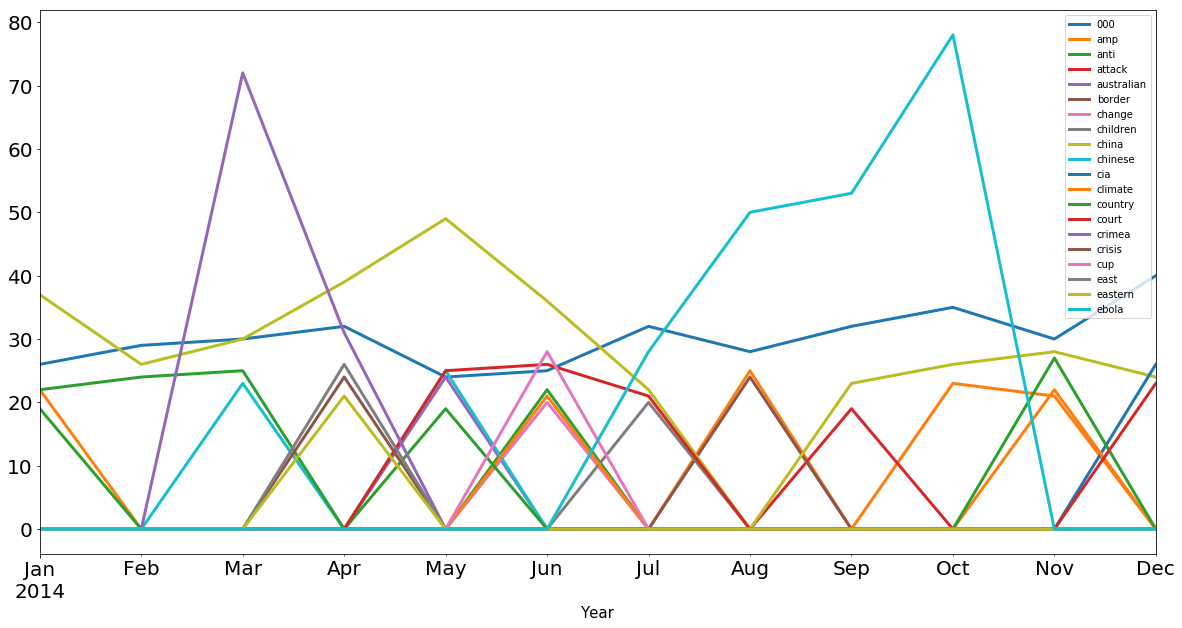

In [99]:
top25_token_by_year_month.iloc[:,0:20].plot(figsize=(20,10), linewidth=3, fontsize=20)
plt.xlabel('Year', fontsize=15);

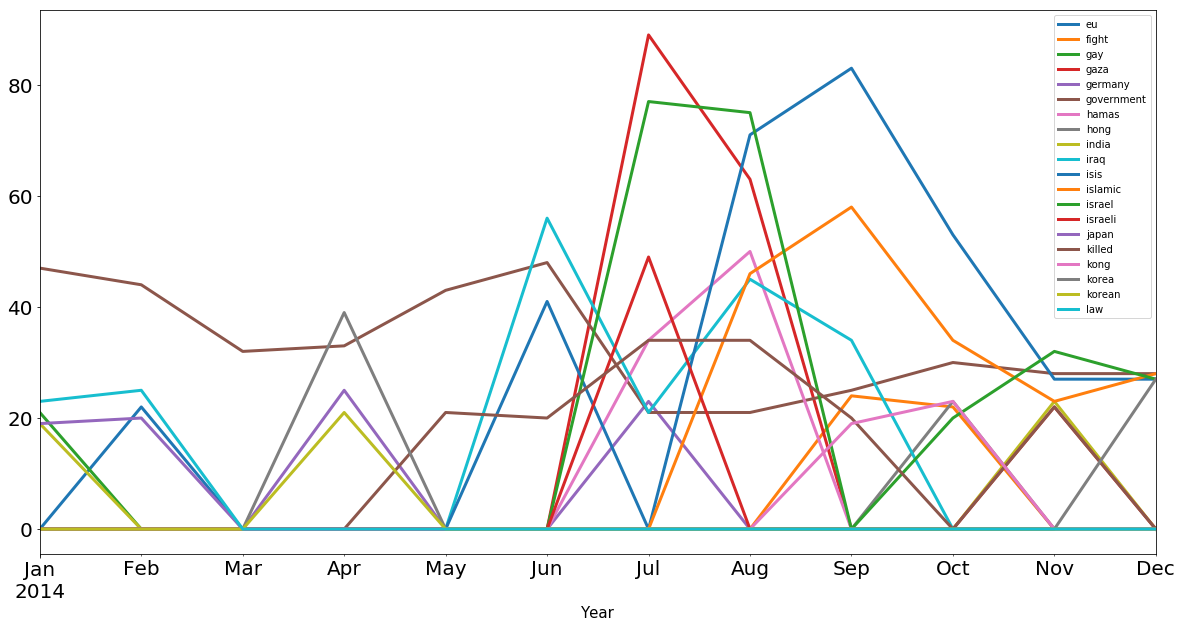

In [100]:
top25_token_by_year_month.iloc[:,20:40].plot(figsize=(20,10), linewidth=3, fontsize=20)
plt.xlabel('Year', fontsize=15);

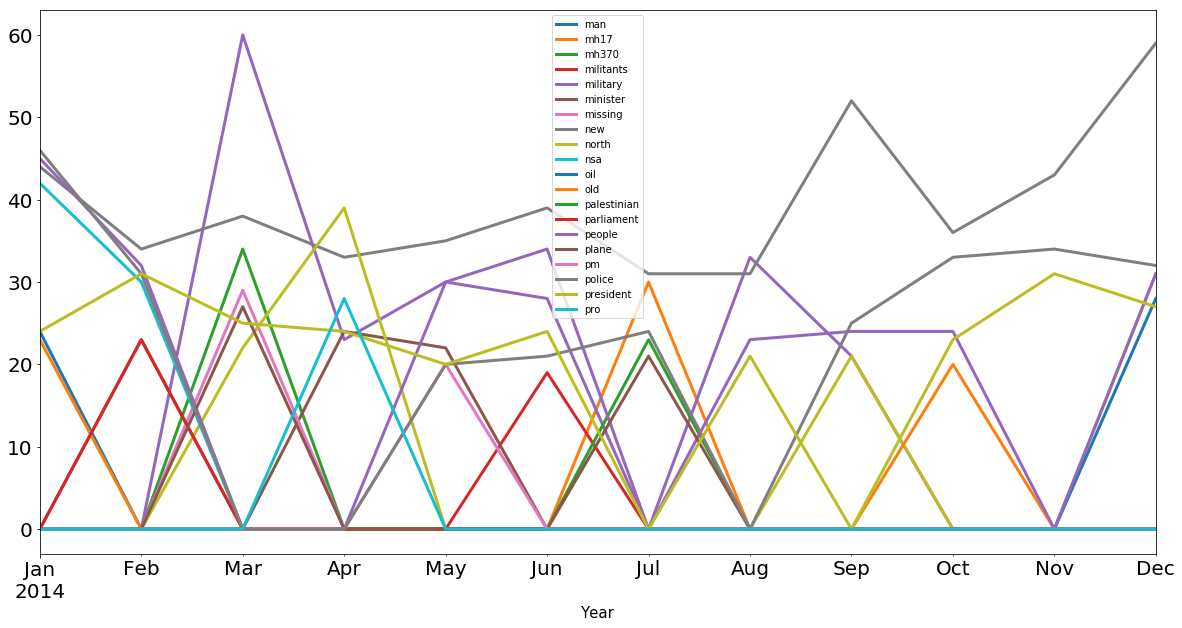

In [101]:
top25_token_by_year_month.iloc[:,40:60].plot(figsize=(20,10), linewidth=3, fontsize=20)
plt.xlabel('Year', fontsize=15);

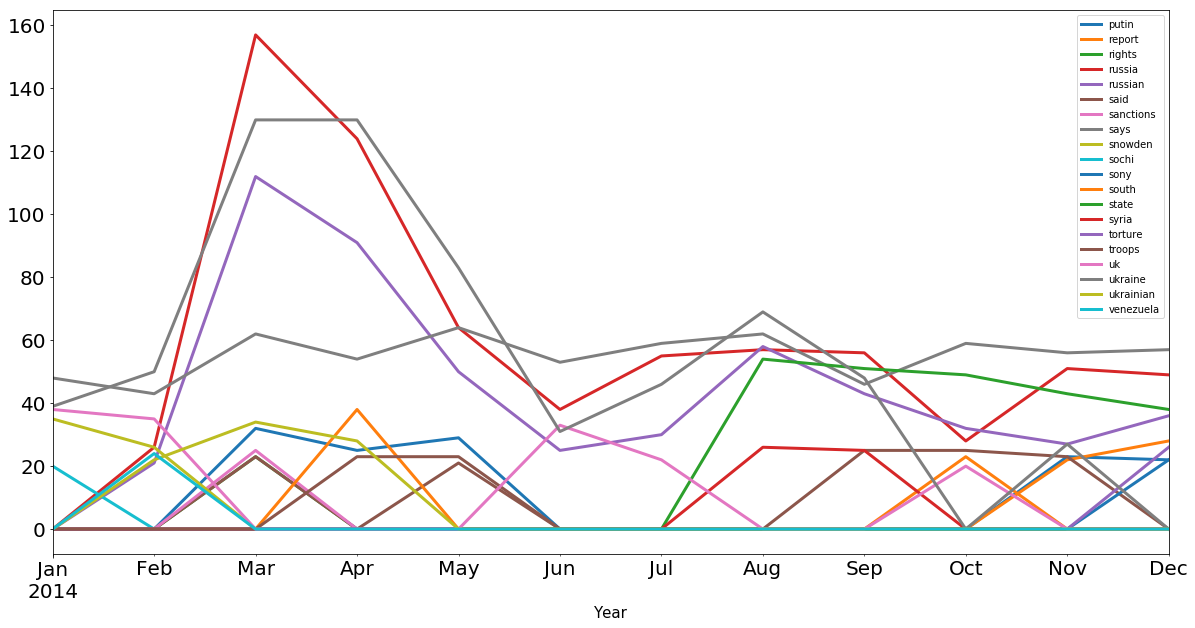

In [102]:
top25_token_by_year_month.iloc[:,60:80].plot(figsize=(20,10), linewidth=3, fontsize=20)
plt.xlabel('Year', fontsize=15);

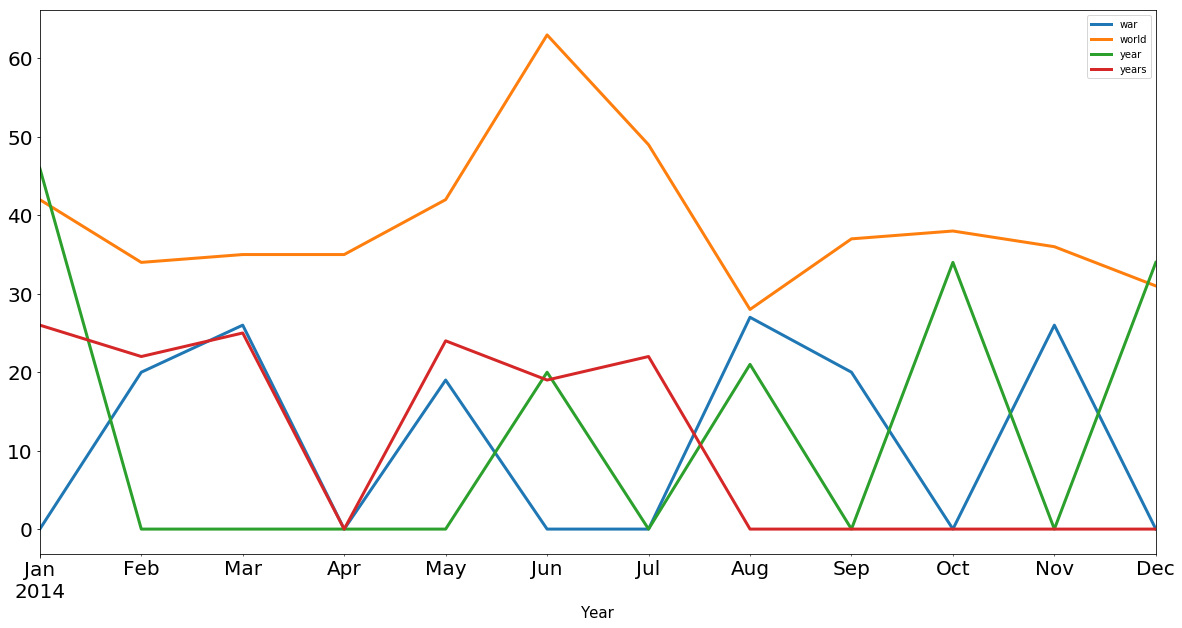

In [103]:
top25_token_by_year_month.iloc[:,80:85].plot(figsize=(20,10), linewidth=3, fontsize=20)
plt.xlabel('Year', fontsize=15);

In [104]:
#top25_token_by_year_month_2 = top25_token_by_year_month.reset_index()

#fig = go.Figure()
#fig.add_trace(go.Scatter(x=top25_token_by_year_month_2['Year Month'], y=top25_token_by_year_month_2['government'], name="DJIA High",
#                         line_color='deepskyblue'))


#fig.update_layout(title_text='Sample Time Series',
#                  xaxis_rangeslider_visible=True)
#fig.show()

In [105]:
#[w for w in (df3['News'].head(2).apply(strip('[]'))) if w not in stop]
#[w for w in (df3['News'].head(2).replace(',', '')) if w not in stop]

#[w for w in (df3['News'].head(2).apply(tokenizer_porter)) if w not in stop]

In [106]:
#[w for w in (df3['News'].head(2).apply(word_tokenize)) if w not in stop]

In [107]:
#Tokenization for comparison
#print(vectorizer.get_feature_names())

In [108]:
df2_mini = df2.head(250)
#df2_mini

In [146]:
fig = go.Figure(data=[go.Candlestick(x=df2['Date'],
                open=df2['Open'],
                high=df2['High'],
                low=df2['Low'],
                close=df2['Close'])])

fig.update_layout(title_text='DJIA Price Action')
fig.show()

In [110]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df2.Date, y=df2['High'], name="DJIA High",
                         line_color='deepskyblue'))

fig.add_trace(go.Scatter(x=df2.Date, y=df2['Low'], name="DJIA Low",
                         line_color='dimgray'))

fig.update_layout(title_text='DJIA Time Series',
                  xaxis_rangeslider_visible=True)
fig.show()